In [17]:
import pickle
import pandas as pd 
import numpy as np 

In [18]:
# Shared folder to read data
SHARED_FOLDER = './yelp'

# Your folder to write new data and create notebooks.
MY_FOLDER = './output'

# result of all

In [19]:
all_business=pd.read_csv('{}/more_business.csv'.format(SHARED_FOLDER))
all_business

,Unnamed: 0,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,...,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,avg_review_stars,reviews_count,tip_count,checkin_count
0,0,"{'Ambience': {'classy': False, 'trendy': False...",4gRF6fR91xqaur88C3_DWw,"['Pizza', 'Restaurants', 1]",Tempe,{},33.422218,-111.925847,False,23,...,25,25,25,25,25,25,2.391304,23,3,10
1,1,"{'Parking': {'garage': False, 'valet': False, ...",QQ0VZ1ggQO1aVf_GK6kn5g,"['Vegetarian', 'Diners', 'Vegan', 'Restaurants...",Phoenix,"{'Friday': {'close': '16:00', 'open': '07:00'}...",33.457226,-112.089834,False,216,...,16,7,16,7,16,7,4.216080,199,45,620
2,2,"{'Price Range': 2, 'Delivery': False, 'Wheelch...",iung9K8cFAPLdA9k2DUoxA,"['Barbeque', 'Restaurants', 1]",Phoenix,{},33.678615,-111.974607,False,31,...,25,25,25,25,25,25,2.300000,30,7,22
3,3,"{'Parking': {'garage': False, 'valet': False, ...",QBoynogVWpl44LglOEIYhw,"['Tex-Mex', 'Restaurants', 1]",Tempe,{},33.414355,-111.926294,True,46,...,25,25,25,25,25,25,3.500000,46,9,150
4,4,"{'Caters': False, 'Delivery': False, 'Price Ra...",36iFlBCnKNOyWFFXDjF0Hg,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Mesa,"{'Friday': {'close': '23:00', 'open': '10:30'}...",33.379200,-111.785500,True,5,...,22,10,22,10,22,10,2.600000,5,7,55
5,5,"{'Accepts Credit Cards': True, 'Parking': {'ga...",LTk9XA-htXS-ngVfnnQPUA,"['Food', 'Automotive', 'Convenience Stores', '...",Phoenix,"{'Friday': {'close': '00:00', 'open': '00:00'}...",33.479867,-112.117920,True,6,...,0,0,0,0,0,0,4.200000,5,2,124
6,6,"{'Parking': {'garage': False, 'valet': False, ...",D0tHnskAgaRjCBdoXVev_g,"['Fast Food', 'Restaurants', 1]",Tempe,{},33.407353,-111.945569,True,29,...,25,25,25,25,25,25,3.666667,27,15,178
7,7,"{'Price Range': 1, 'Delivery': False, 'Wheelch...",Kqn4J9NTgZdMAnV4HuYh5A,"['Food', 'Coffee & Tea', 1]",Phoenix,{},33.675854,-111.966734,False,62,...,25,25,25,25,25,25,4.338710,62,15,171
8,8,"{'By Appointment Only': False, 'Parking': {'ga...",omHC9VhPZIQiAXWnZEe8eA,"['Shopping', 'Drugstores', 'Beauty & Spas', 'F...",Gilbert,"{'Friday': {'close': '00:00', 'open': '00:00'}...",33.267073,-111.686889,True,10,...,0,0,0,0,0,0,2.875000,8,3,35
9,9,"{'Caters': False, 'Good For Dancing': False, '...",cjUmPLRT43wN9Z87A9BOpg,"['Bars', 'American (Traditional)', 'Nightlife'...",Phoenix,"{'Friday': {'close': '02:00', 'open': '11:00'}...",33.509568,-112.073327,True,85,...,2,11,1,11,1,11,2.756410,78,30,357


In [28]:
del all_business['Unnamed: 0']
del all_business['avg_review_stars']

In [6]:
import xgboost as xgb
import operator

## important features and performance

In [32]:
features = list(all_business.columns[5:])
X = all_business[features]
del X['stars']
y =all_business['stars']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.05, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)
#do_metrics(y_test, ans)

[('latitude', 4209), ('longitude', 3810), ('checkin_count', 2441), ('review_count', 2051), ('tip_count', 1359), ('reviews_count', 1273), ('hours.Friday.close', 445), ('attributes.Alcohol', 421), ('attributes.NoiseLevel', 400), ('hours.Monday.close', 379), ('attributes.PriceRange', 377), ('hours.Sunday.open', 373), ('hours.Friday.open', 372), ('attributes.WiFi', 352), ('hours.Sunday.close', 323), ('attributes.OutdoorSeating', 317), ('open', 316), ('attributes.WaiterService', 304), ('attributes.WheelchairAccessible', 301), ('hours.Thursday.close', 290), ('attributes.Caters', 286), ('hours.Monday.open', 285), ('hours.Saturday.close', 279), ('hours.Saturday.open', 277), ('attributes.DriveThru', 260), ('attributes.Ambience.casual', 236), ('attributes.Parking.lot', 234), ('attributes.Delivery', 200), ('attributes.TakesReservations', 192), ('attributes.GoodForGroups', 186), ('attributes.Parking.garage', 184), ('attributes.Attire', 168), ('attributes.Parking.street', 149), ('attributes.GoodFor

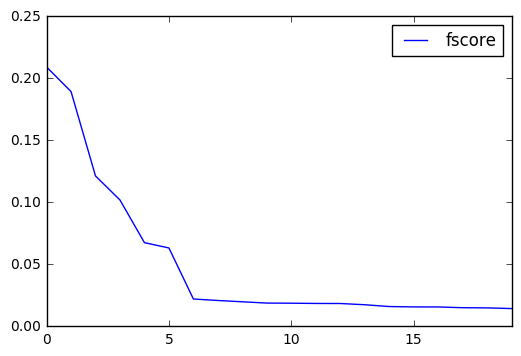

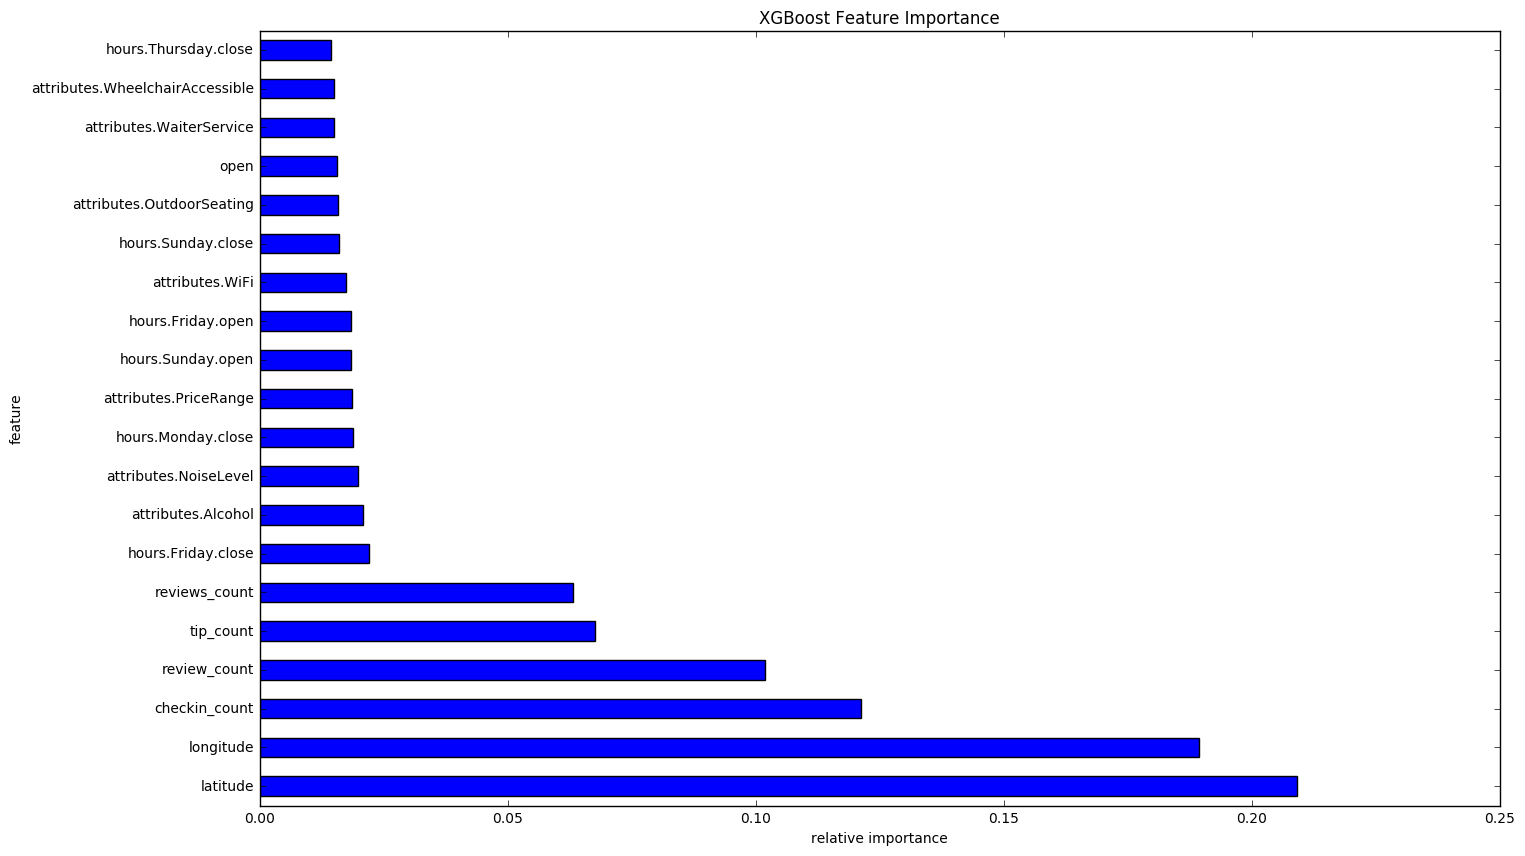

In [33]:
from matplotlib import pylab as plt
all_df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

In [34]:
dtest = xgb.DMatrix(X_test)
ans = gbdt.predict(dtest)
r_square=metrics.r2_score(y_test, ans, sample_weight=None, multioutput='uniform_average')
MSE=metrics.mean_squared_error(y_test, ans)
print('r_square is %s,MSE is %s'%(r_square,MSE))

r_square is 0.268167891499,MSE is 0.417969377448


## chose one restaurant as test

In [21]:
number=100
X_test=all_business[number:number+1]
features = list(X_test.columns[5:])
X_test = X_test[features]
y_test=X_test['stars']
del X_test['stars']
all_business.drop(all_business.index[[number]],inplace=True)

In [22]:
features = list(all_business.columns[5:116])
X_train = all_business[features]
del X_train['stars']
y_train =all_business['stars']

atrribut is tip_count 

stars initial is [ 4.07067108] 

value is 1 , result is 4.073583
value is 2 , result is 4.070424
value is 3 , result is 4.070671
value is 4 , result is 4.070671
value is 5 , result is 4.070671
value is 6 , result is 4.070671
value is 7 , result is 4.070963
value is 8 , result is 4.070836
value is 9 , result is 4.070836
value is 10 , result is 4.060090
value is 11 , result is 4.058866
value is 12 , result is 4.058725
value is 13 , result is 4.058482
value is 14 , result is 4.058482
value is 15 , result is 4.056513
value is 16 , result is 4.056513
value is 17 , result is 4.056513
value is 18 , result is 4.056513
value is 19 , result is 4.056513
value is 20 , result is 4.056513
value is 21 , result is 4.056513
value is 22 , result is 4.056513
value is 23 , result is 4.056513
value is 24 , result is 4.056513
value is 25 , result is 4.054917
value is 26 , result is 4.054917
value is 27 , result is 4.054917
value is 28 , result is 4.054917
value is 29 , result is 4.05

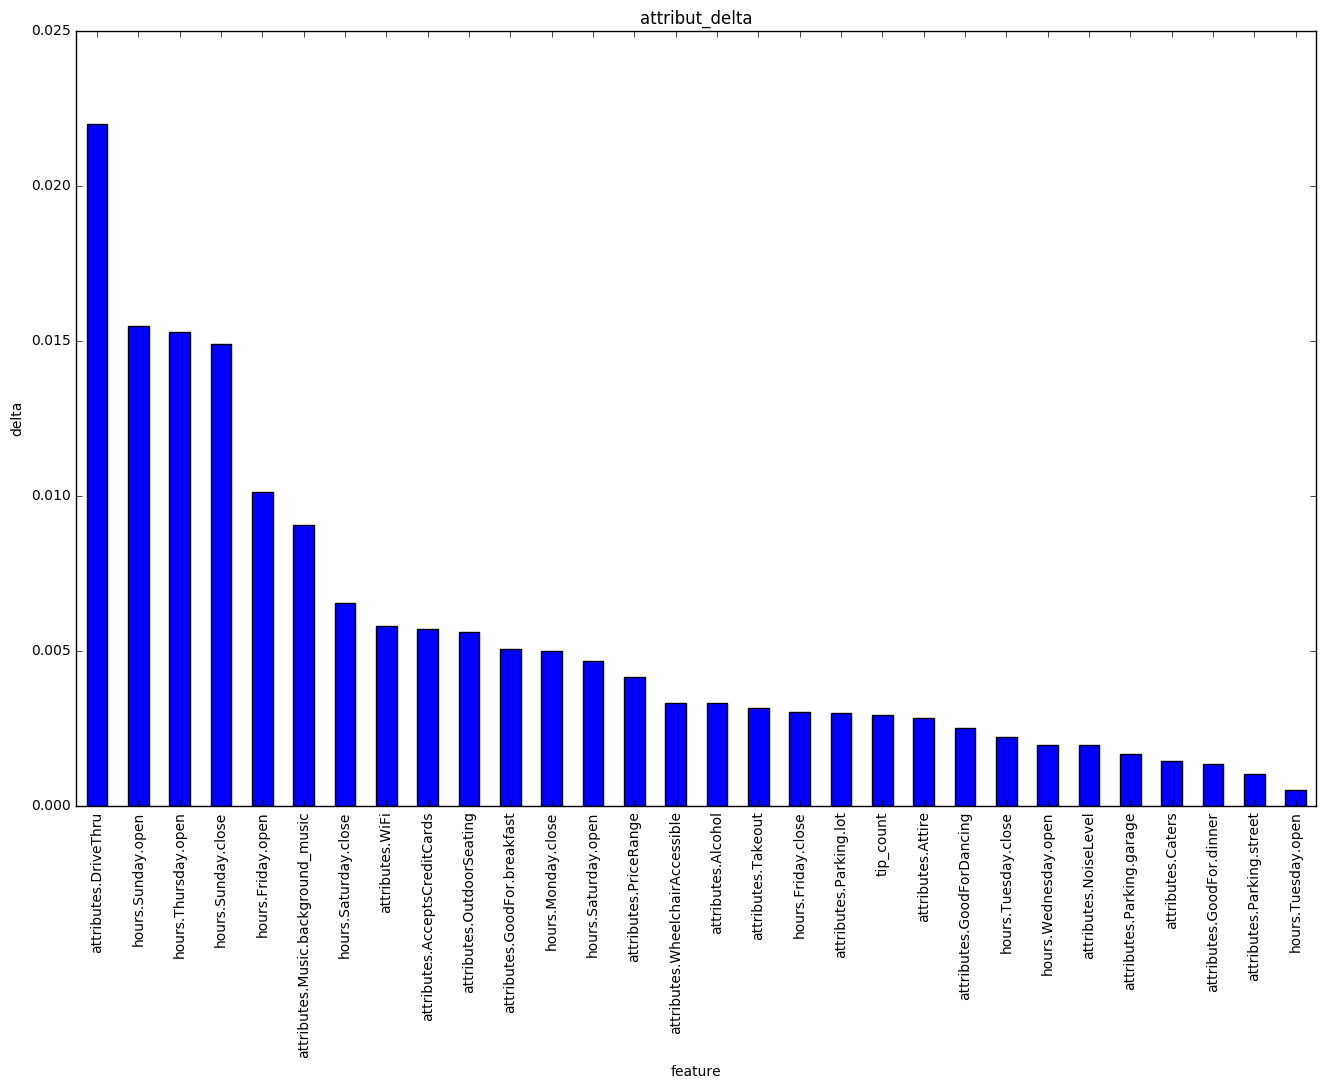

In [23]:
from sklearn import cross_validation, metrics
from matplotlib import pylab as plt
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(50)
feature=df['feature']
attribut_delta=[]
for i in feature[6:]:
    value=sorted(list(all_business[i].value_counts().index))
    value_init=X_test[i]
    dtest = xgb.DMatrix(X_test)
    ans = gbdt.predict(dtest)
    star_init=ans
    print('atrribut is %s \n'%i)
    print('stars initial is %s \n'%star_init)
    maxi=0
    for j in value:
        X_test[i]=j
        dtest = xgb.DMatrix(X_test)
        ans = gbdt.predict(dtest)
        if ans>maxi:
            maxi=ans
        print('value is %d'%j,',','result is %f'%ans)
    delta=maxi-star_init
    X_test[i]=value_init
    attribut_delta.append((i,delta[0]))
    print('delta max is %s \n'%delta)
    print('-------------------------------------------')

df = pd.DataFrame(attribut_delta, columns=['feature', 'delta'])
df=df.sort_values(by='delta',ascending=False).head(30)

plt.figure()
df.plot(kind='bar', x='feature', y='delta', legend=False, figsize=(16, 10))
plt.title('attribut_delta')
plt.ylabel('delta')
plt.gcf().savefig('attribut_delta.png')
plt.show()

# 1.1Bon category fast food

In [39]:
bon_category_fastfood=pd.read_csv('{}/category/bon_category_fastfood.csv'.format(SHARED_FOLDER))
all_business=bon_category_fastfood
del all_business['Unnamed: 0']
del all_business['avg_review_stars']
all_business

,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,stars,...,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,reviews_count,tip_count,checkin_count,category,category1,labels
0,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",D0tHnskAgaRjCBdoXVev_g,"['Fast Food', 'Restaurants', 1]",Tempe,{},33.407353,-111.945569,True,29,3.5,...,25,25,25,25,27,15,178,Fast Food,Fast Food,1
1,"{'Take-out': True, 'Has TV': True, 'Alcohol': ...",noaKqyRwXTW4__8p4h5ZSw,"['Burgers', 'Delis', 'American (New)', 'Restau...",Scottsdale,"{'Saturday': {'close': '21:00', 'open': '11:00...",33.671877,-111.905845,False,21,4.0,...,21,11,21,11,21,11,29,Burgers,Fast Food,1
2,"{'Smoking': 'no', 'Music': {'dj': False}, 'Goo...",udVKZfBZ3IyZf_mlTy0law,"['Sandwiches', 'Restaurants', 1]",Wickenburg,"{'Saturday': {'close': '16:00', 'open': '07:30...",33.969238,-112.730715,True,50,4.0,...,16,7,16,7,41,12,104,Sandwiches,Fast Food,1
3,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",93fEJZYc3B-jOMaXce7G5A,"['Italian', 'Pizza', 'Salad', 'Restaurants', 1]",Phoenix,"{'Saturday': {'close': '22:00', 'open': '11:00...",33.666693,-112.124353,True,173,4.0,...,21,10,21,10,160,46,527,Pizza,Fast Food,1
4,"{'Delivery': False, 'Take-out': False, 'Has TV...",CIgXglXMtnjjbgG6i0BKJg,"['Fast Food', 'Restaurants', 1]",Surprise,{},33.639122,-112.354812,True,4,3.5,...,25,25,25,25,3,4,17,Fast Food,Fast Food,1
5,"{'Delivery': True, 'Has TV': True, 'Alcohol': ...",rsI6iakvvpOTF3pTXAMYBA,"['Italian', 'Pizza', 'Sandwiches', 'Restaurant...",Mesa,"{'Saturday': {'close': '21:00', 'open': '11:00...",33.362575,-111.635310,True,47,4.0,...,21,10,21,10,47,12,44,Pizza,Fast Food,1
6,"{'Delivery': True, 'Has TV': True, 'Alcohol': ...",rsI6iakvvpOTF3pTXAMYBA,"['Italian', 'Pizza', 'Sandwiches', 'Restaurant...",Mesa,"{'Saturday': {'close': '21:00', 'open': '11:00...",33.362575,-111.635310,True,47,4.0,...,21,10,21,10,47,12,44,Sandwiches,Fast Food,1
7,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",mM4JGpza3KkegHYUN7T79w,"['Fast Food', 'Japanese', 'Restaurants', 1]",Phoenix,"{'Saturday': {'close': '18:00', 'open': '10:30...",33.512745,-112.100296,True,31,3.5,...,19,10,19,10,31,23,137,Fast Food,Fast Food,1
8,"{'Take-out': True, 'Has TV': False, 'Alcohol':...",ATeF8pmKd50Xx6Nkd_BsXw,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Phoenix,"{'Saturday': {'close': '01:00', 'open': '07:00...",33.611060,-112.111991,True,11,3.5,...,0,7,0,7,9,2,37,Fast Food,Fast Food,1
9,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",859jud754SQWHDpIXeBAiQ,"['Food', 'Ice Cream & Frozen Yogurt', 'Fast Fo...",Mesa,{},33.414874,-111.817630,True,4,3.5,...,25,25,25,25,4,2,21,Fast Food,Fast Food,1


## importance and performance

In [42]:
features = list(all_business.columns[5:96])
X = all_business[features]
del X['stars']
y =all_business['stars']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.05, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)
#do_metrics(y_test, ans)

[('latitude', 4027), ('longitude', 3361), ('checkin_count', 2032), ('review_count', 1932), ('reviews_count', 1187), ('tip_count', 1178), ('hours.Friday.close', 527), ('attributes.Alcohol', 415), ('hours.Sunday.close', 385), ('attributes.DriveThru', 383), ('attributes.NoiseLevel', 353), ('attributes.Caters', 318), ('attributes.WiFi', 317), ('attributes.WaiterService', 303), ('hours.Friday.open', 301), ('attributes.OutdoorSeating', 292), ('attributes.PriceRange', 287), ('hours.Sunday.open', 286), ('attributes.Ambience.casual', 267), ('hours.Saturday.open', 264), ('hours.Monday.close', 252), ('open', 249), ('hours.Saturday.close', 246), ('attributes.Delivery', 202), ('attributes.WheelchairAccessible', 200), ('hours.Thursday.close', 189), ('attributes.GoodFor.lunch', 174), ('hours.Monday.open', 168), ('attributes.GoodFor.dinner', 163), ('attributes.Parking.lot', 161), ('attributes.GoodForGroups', 157), ('attributes.TakesReservations', 152), ('attributes.GoodFor.breakfast', 145), ('attribut

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x00000247DC855908>>
Traceback (most recent call last):
  File "C:\Users\18791\Anaconda3\lib\site-packages\xgboost\core.py", line 368, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


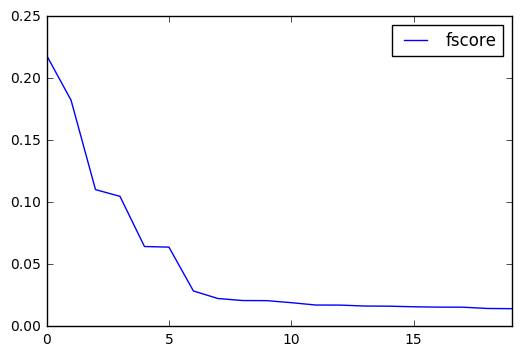

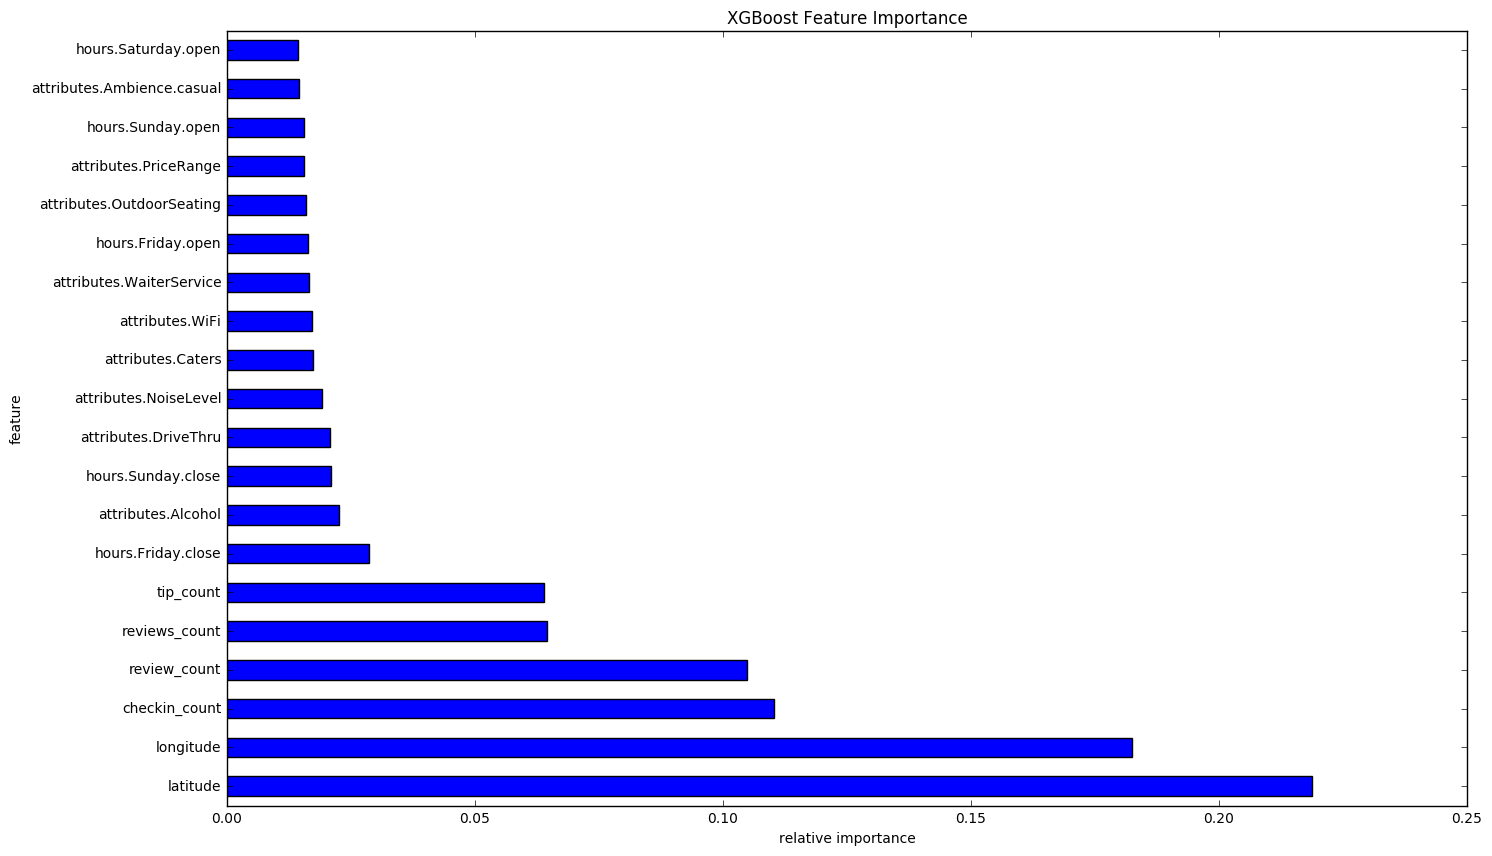

In [43]:
from matplotlib import pylab as plt
all_df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

In [44]:
dtest = xgb.DMatrix(X_test)
ans = gbdt.predict(dtest)
r_square=metrics.r2_score(y_test, ans, sample_weight=None, multioutput='uniform_average')
MSE=metrics.mean_squared_error(y_test, ans)
print('r_square is %s,MSE is %s'%(r_square,MSE))

r_square is 0.265502530386,MSE is 0.111322884237


## chose one

In [48]:
number=100
X_test=all_business[number:number+1]
features = list(X_test.columns[5:96])
X_test = X_test[features]
y_test=X_test['stars']
del X_test['stars']
all_business.drop(all_business.index[[number]],inplace=True)

In [49]:
features = list(all_business.columns[5:96])
X_train = all_business[features]
del X_train['stars']
y_train =all_business['stars']

atrribut is hours.Friday.close 

stars initial is [ 3.96930742] 

value is 0 , result is 3.899192
value is 1 , result is 3.894215
value is 2 , result is 3.894215
value is 3 , result is 3.892885
value is 4 , result is 3.892231
value is 5 , result is 3.892231
value is 6 , result is 3.892231
value is 7 , result is 3.892231
value is 11 , result is 3.895797
value is 13 , result is 3.895797
value is 14 , result is 3.956692
value is 15 , result is 3.969307
value is 16 , result is 3.971091
value is 17 , result is 3.971091
value is 18 , result is 3.969647
value is 19 , result is 3.955122
value is 20 , result is 3.938651
value is 21 , result is 3.930880
value is 22 , result is 3.897642
value is 23 , result is 3.902285
value is 25 , result is 3.902285
delta max is [ 0.00178313] 

-------------------------------------------
atrribut is attributes.OutdoorSeating 

stars initial is [ 3.90228534] 

value is 0 , result is 3.902285
value is 1 , result is 3.880712
value is 2 , result is 3.785427
delta m

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x00000247DCBFF128>>
Traceback (most recent call last):
  File "C:\Users\18791\Anaconda3\lib\site-packages\xgboost\core.py", line 368, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


atrribut is attributes.WheelchairAccessible 

stars initial is [ 3.83282518] 

value is 0 , result is 3.836896
value is 1 , result is 3.832825
value is 2 , result is 3.788528
delta max is [ 0.004071] 

-------------------------------------------
atrribut is hours.Monday.close 

stars initial is [ 3.7885282] 

value is 0 , result is 3.756503
value is 1 , result is 3.756503
value is 2 , result is 3.756503
value is 3 , result is 3.756503
value is 4 , result is 3.756503
value is 5 , result is 3.756503
value is 6 , result is 3.773823
value is 7 , result is 3.773823
value is 13 , result is 3.774249
value is 14 , result is 3.788528
value is 15 , result is 3.788528
value is 16 , result is 3.788528
value is 17 , result is 3.788528
value is 18 , result is 3.788528
value is 19 , result is 3.779148
value is 20 , result is 3.777742
value is 21 , result is 3.777742
value is 22 , result is 3.776414
value is 23 , result is 3.779173
value is 25 , result is 3.781410
delta max is [ 0.] 

----------------

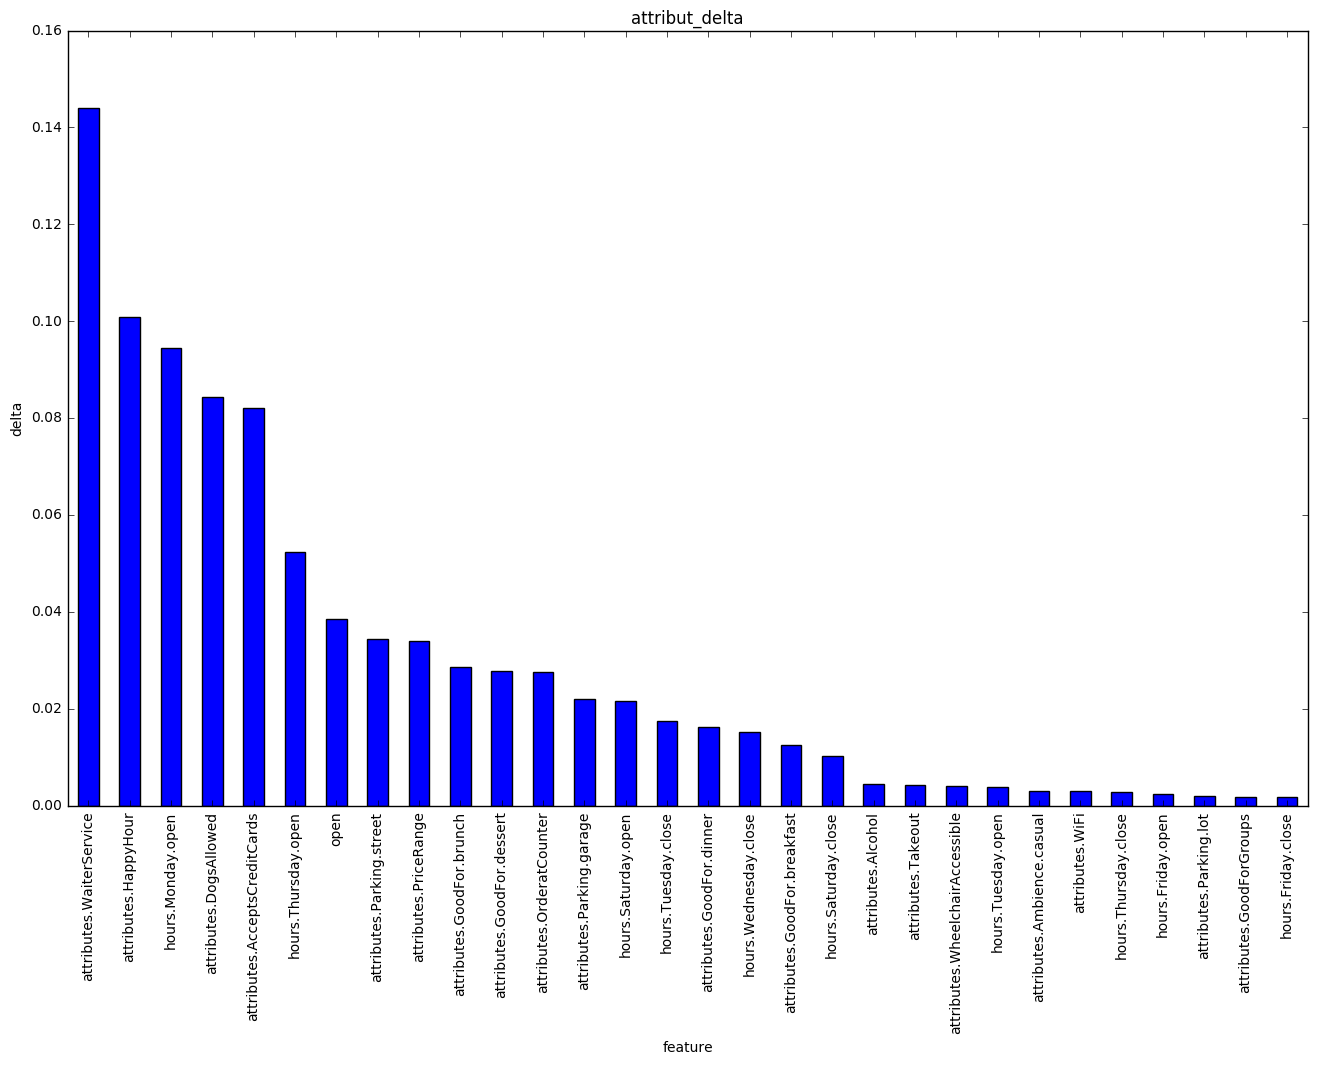

In [50]:
from sklearn import cross_validation, metrics
from matplotlib import pylab as plt
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(50)
feature=df['feature']
attribut_delta=[]
for i in feature[6:]:
    value=sorted(list(all_business[i].value_counts().index))
    value_init=X_test[i]
    dtest = xgb.DMatrix(X_test)
    ans = gbdt.predict(dtest)
    star_init=ans
    print('atrribut is %s \n'%i)
    print('stars initial is %s \n'%star_init)
    maxi=0
    for j in value:
        X_test[i]=j
        dtest = xgb.DMatrix(X_test)
        ans = gbdt.predict(dtest)
        if ans>maxi:
            maxi=ans
        print('value is %d'%j,',','result is %f'%ans)
    delta=maxi-star_init
    X_test[i]=value_init
    attribut_delta.append((i,delta[0]))
    print('delta max is %s \n'%delta)
    print('-------------------------------------------')

df = pd.DataFrame(attribut_delta, columns=['feature', 'delta'])
df=df.sort_values(by='delta',ascending=False).head(30)

plt.figure()
df.plot(kind='bar', x='feature', y='delta', legend=False, figsize=(16, 10))
plt.title('attribut_delta')
plt.ylabel('delta')
plt.gcf().savefig('attribut_delta.png')
plt.show()

# 1.2mauvais category fastfood

In [51]:
mauvais_category_fastfood=pd.read_csv('{}/category/mauvais_category_fastfood.csv'.format(SHARED_FOLDER))
all_business=mauvais_category_fastfood
del all_business['Unnamed: 0']
del all_business['avg_review_stars']
all_business

,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,stars,...,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,reviews_count,tip_count,checkin_count,category,category1,labels
0,"{'Take-out': True, 'Has TV': True, 'Noise Leve...",4gRF6fR91xqaur88C3_DWw,"['Pizza', 'Restaurants', 1]",Tempe,{},33.422218,-111.925847,False,23,2.5,...,25,25,25,25,23,3,10,Pizza,Fast Food,0
1,"{'Take-out': True, 'Has TV': False, 'Alcohol':...",36iFlBCnKNOyWFFXDjF0Hg,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Mesa,"{'Saturday': {'close': '23:00', 'open': '10:30...",33.379200,-111.785500,True,5,2.5,...,22,10,22,10,5,7,55,Fast Food,Fast Food,0
2,"{'Take-out': True, 'Has TV': True, 'Alcohol': ...",QTBUIAFtdUx-YMcWaI3GiQ,"['Fast Food', 'Restaurants', 1]",Buckeye,{},33.441598,-112.555938,True,17,2.5,...,25,25,25,25,17,4,32,Fast Food,Fast Food,0
3,"{'Take-out': True, 'Has TV': True, 'Alcohol': ...",WsMSmLc9ahQJ3gOfN0ShVQ,"['Chicken Wings', 'Restaurants', 1]",Laveen,"{'Saturday': {'close': '00:00', 'open': '10:45...",33.378666,-112.168879,True,26,3.0,...,0,10,0,10,27,6,78,Chicken Wings,Fast Food,0
4,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",EuNV8_SReV_3KeET2Ums6A,"['Fast Food', 'Sushi Bars', 'Japanese', 'Resta...",Scottsdale,{},33.489192,-111.927293,False,45,3.0,...,25,25,25,25,42,10,177,Fast Food,Fast Food,0
5,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",LtJmxo4ZozEyB8JVwltMkw,"['Burgers', 'Fast Food', 'Restaurants', 1]",Phoenix,{},33.429745,-112.065708,True,5,3.0,...,25,25,25,25,5,6,55,Burgers,Fast Food,0
6,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",LtJmxo4ZozEyB8JVwltMkw,"['Burgers', 'Fast Food', 'Restaurants', 1]",Phoenix,{},33.429745,-112.065708,True,5,3.0,...,25,25,25,25,5,6,55,Fast Food,Fast Food,0
7,"{'Take-out': True, 'Accepts Credit Cards': Tru...",f1FurDaaizVNfYn_neatXQ,"['Fast Food', 'Sandwiches', 'Restaurants', 1]",Mesa,{},33.378877,-111.837305,True,4,3.0,...,25,25,25,25,3,1,12,Fast Food,Fast Food,0
8,"{'Take-out': True, 'Accepts Credit Cards': Tru...",f1FurDaaizVNfYn_neatXQ,"['Fast Food', 'Sandwiches', 'Restaurants', 1]",Mesa,{},33.378877,-111.837305,True,4,3.0,...,25,25,25,25,3,1,12,Sandwiches,Fast Food,0
9,"{'Price Range': 1, 'Waiter Service': False}",GN9BLeYPyU1uh3hvAdY7mA,"['Fast Food', 'Sandwiches', 'Restaurants', 1]",Glendale,{},33.567086,-112.168081,True,3,1.5,...,25,25,25,25,3,2,7,Fast Food,Fast Food,0


## feature and performance

In [52]:
features = list(all_business.columns[5:96])
X = all_business[features]
del X['stars']
y =all_business['stars']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.05, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)
#do_metrics(y_test, ans)

[('latitude', 4651), ('longitude', 3796), ('checkin_count', 1996), ('review_count', 1739), ('reviews_count', 914), ('tip_count', 843), ('attributes.NoiseLevel', 466), ('attributes.DriveThru', 418), ('attributes.Caters', 405), ('attributes.Alcohol', 392), ('hours.Friday.close', 385), ('attributes.WiFi', 367), ('attributes.OutdoorSeating', 310), ('attributes.Ambience.casual', 279), ('attributes.PriceRange', 267), ('attributes.GoodForGroups', 260), ('attributes.GoodFor.breakfast', 243), ('hours.Friday.open', 227), ('attributes.WheelchairAccessible', 214), ('attributes.WaiterService', 201), ('attributes.Parking.lot', 195), ('hours.Monday.close', 193), ('attributes.Delivery', 186), ('open', 184), ('attributes.Attire', 173), ('attributes.GoodFor.lunch', 169), ('attributes.Parking.garage', 135), ('hours.Sunday.close', 132), ('hours.Thursday.close', 124), ('hours.Saturday.open', 113), ('attributes.GoodFor.brunch', 101), ('hours.Sunday.open', 97), ('hours.Saturday.close', 95), ('attributes.Take

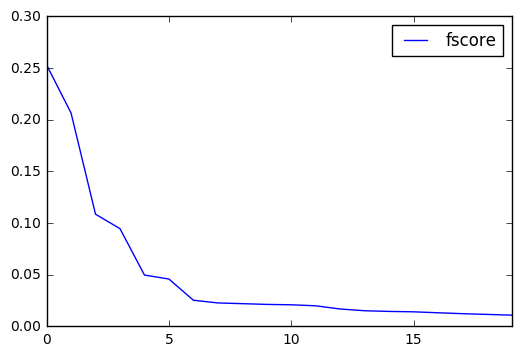

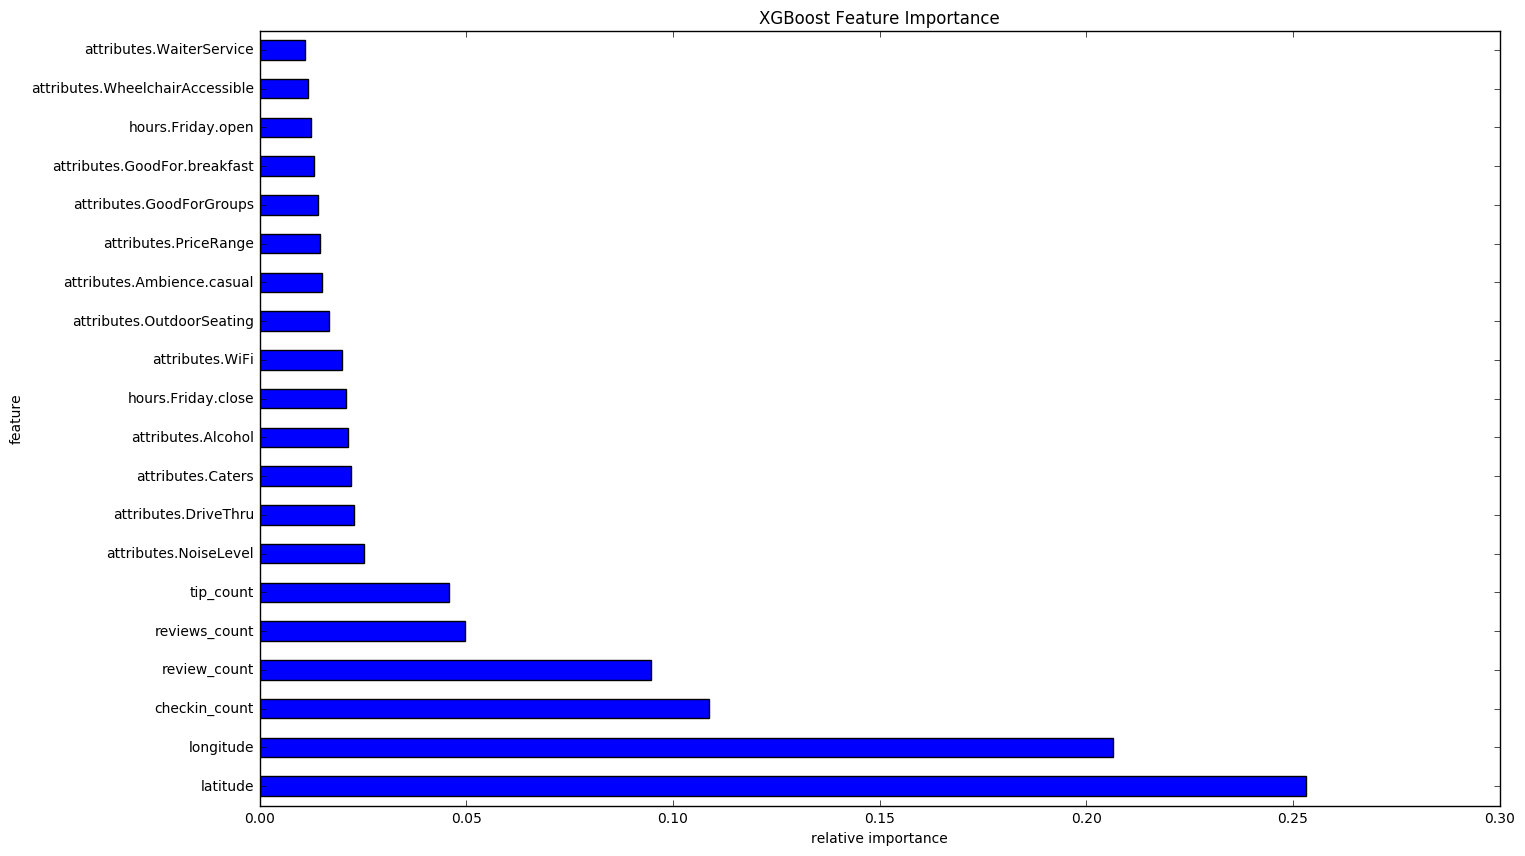

In [53]:
from matplotlib import pylab as plt
all_df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

In [54]:
dtest = xgb.DMatrix(X_test)
ans = gbdt.predict(dtest)
r_square=metrics.r2_score(y_test, ans, sample_weight=None, multioutput='uniform_average')
MSE=metrics.mean_squared_error(y_test, ans)
print('r_square is %s,MSE is %s'%(r_square,MSE))

r_square is 0.503301519585,MSE is 0.137855606389


## chose one

In [55]:
number=100
X_test=all_business[number:number+1]
features = list(X_test.columns[5:96])
X_test = X_test[features]
y_test=X_test['stars']
del X_test['stars']
all_business.drop(all_business.index[[number]],inplace=True)

In [56]:
features = list(all_business.columns[5:96])
X_train = all_business[features]
del X_train['stars']
y_train =all_business['stars']

atrribut is attributes.NoiseLevel 

stars initial is [ 2.71907401] 

value is 0 , result is 2.719074
value is 1 , result is 2.717779
value is 2 , result is 2.703946
value is 3 , result is 2.727203
value is 4 , result is 2.691111
delta max is [ 0.00812888] 

-------------------------------------------
atrribut is attributes.DriveThru 

stars initial is [ 2.69111085] 

value is 0 , result is 2.681417
value is 1 , result is 2.686218
value is 2 , result is 2.691111
delta max is [ 0.] 

-------------------------------------------
atrribut is attributes.GoodForGroups 

stars initial is [ 2.69111085] 

value is 0 , result is 2.549014
value is 1 , result is 2.691111
value is 2 , result is 2.694873
delta max is [ 0.00376177] 

-------------------------------------------
atrribut is attributes.Caters 

stars initial is [ 2.69487262] 

value is 0 , result is 2.651020
value is 1 , result is 2.666252
value is 2 , result is 2.694873
delta max is [ 0.] 

-------------------------------------------
at

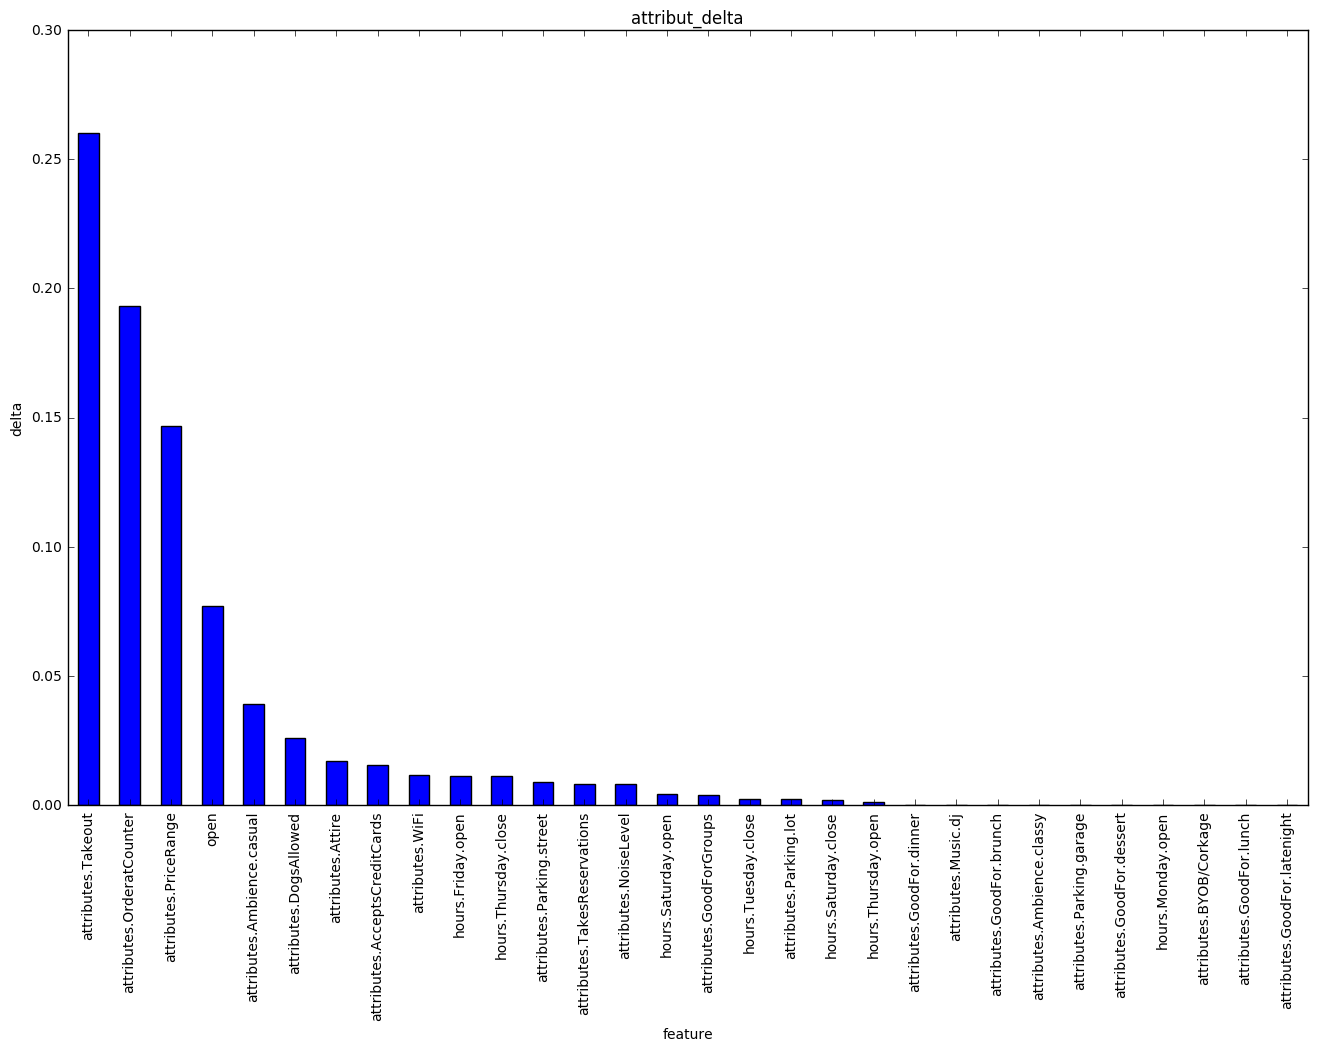

In [57]:
from sklearn import cross_validation, metrics
from matplotlib import pylab as plt
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(50)
feature=df['feature']
attribut_delta=[]
for i in feature[6:]:
    value=sorted(list(all_business[i].value_counts().index))
    value_init=X_test[i]
    dtest = xgb.DMatrix(X_test)
    ans = gbdt.predict(dtest)
    star_init=ans
    print('atrribut is %s \n'%i)
    print('stars initial is %s \n'%star_init)
    maxi=0
    for j in value:
        X_test[i]=j
        dtest = xgb.DMatrix(X_test)
        ans = gbdt.predict(dtest)
        if ans>maxi:
            maxi=ans
        print('value is %d'%j,',','result is %f'%ans)
    delta=maxi-star_init
    X_test[i]=value_init
    attribut_delta.append((i,delta[0]))
    print('delta max is %s \n'%delta)
    print('-------------------------------------------')

df = pd.DataFrame(attribut_delta, columns=['feature', 'delta'])
df=df.sort_values(by='delta',ascending=False).head(30)

plt.figure()
df.plot(kind='bar', x='feature', y='delta', legend=False, figsize=(16, 10))
plt.title('attribut_delta')
plt.ylabel('delta')
plt.gcf().savefig('attribut_delta.png')
plt.show()

# 2.1bon category Vegeterian

In [58]:
bon_category_vegeterian=pd.read_csv('{}/category/bon_category_vegeterian.csv'.format(SHARED_FOLDER))
all_business=bon_category_vegeterian
del all_business['Unnamed: 0']
del all_business['avg_review_stars']
all_business

,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,stars,...,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,reviews_count,tip_count,checkin_count,category,category1,labels
0,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",QQ0VZ1ggQO1aVf_GK6kn5g,"['Vegetarian', 'Diners', 'Vegan', 'Restaurants...",Phoenix,"{'Saturday': {'close': '16:00', 'open': '07:00...",33.457226,-112.089834,False,216,4.5,...,16,7,16,7,199,45,620,Vegetarian,Vegeterian,1
1,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",QQ0VZ1ggQO1aVf_GK6kn5g,"['Vegetarian', 'Diners', 'Vegan', 'Restaurants...",Phoenix,"{'Saturday': {'close': '16:00', 'open': '07:00...",33.457226,-112.089834,False,216,4.5,...,16,7,16,7,199,45,620,Vegan,Vegeterian,1
2,"{'Take-out': True, 'Has TV': False, 'Alcohol':...",BYUuTblhSh862AefQyJIWQ,"['Vegetarian', 'American (New)', 'Salad', 'Res...",Phoenix,"{'Saturday': {'close': '21:00', 'open': '11:00...",33.509610,-112.071953,True,17,4.5,...,21,11,21,11,11,2,55,Vegetarian,Vegeterian,1
3,"{'Take-out': True, 'Has TV': True, 'Alcohol': ...",NmDm0CFwN1YrqqqLZ4CCsg,"['Vegetarian', 'Asian Fusion', 'Vegan', 'Resta...",Tempe,"{'Saturday': {'close': '21:00', 'open': '17:00...",33.421479,-111.945394,True,8,5.0,...,21,17,21,17,8,4,15,Vegetarian,Vegeterian,1
4,"{'Take-out': True, 'Has TV': True, 'Alcohol': ...",NmDm0CFwN1YrqqqLZ4CCsg,"['Vegetarian', 'Asian Fusion', 'Vegan', 'Resta...",Tempe,"{'Saturday': {'close': '21:00', 'open': '17:00...",33.421479,-111.945394,True,8,5.0,...,21,17,21,17,8,4,15,Vegan,Vegeterian,1
5,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",uvEY8YmESqVYZe1Ziz7AKQ,"['Food', 'Coffee & Tea', 'Gluten-Free', 'Vegan...",Mesa,"{'Saturday': {'close': '20:00', 'open': '08:00...",33.375052,-111.687184,True,131,4.5,...,20,8,20,8,125,21,326,Vegan,Vegeterian,1
6,"{'Take-out': True, 'Has TV': False, 'Alcohol':...",Xa97JemlQbfmhk_Uca_WGw,"['Nutritionists', 'Health & Medical', 'Vegan',...",Gilbert,"{'Saturday': {'close': '19:00', 'open': '09:00...",33.337206,-111.808435,True,12,5.0,...,19,9,19,9,12,2,15,Vegan,Vegeterian,1
7,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",g6SHDb-0BYr2weF7heRsjg,"['Breakfast & Brunch', 'Vegetarian', 'Vegan', ...",Mesa,"{'Thursday': {'close': '14:30', 'open': '07:30...",33.362933,-111.875324,True,66,5.0,...,14,7,14,7,61,5,118,Vegetarian,Vegeterian,1
8,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",g6SHDb-0BYr2weF7heRsjg,"['Breakfast & Brunch', 'Vegetarian', 'Vegan', ...",Mesa,"{'Thursday': {'close': '14:30', 'open': '07:30...",33.362933,-111.875324,True,66,5.0,...,14,7,14,7,61,5,118,Vegan,Vegeterian,1
9,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",yTcLdWP3cnJS69P_U9nwHQ,"['Food', 'Vegetarian', 'Juice Bars & Smoothies...",Phoenix,"{'Saturday': {'close': '20:00', 'open': '07:00...",33.447484,-112.074630,True,40,4.5,...,20,7,20,7,33,6,168,Vegetarian,Vegeterian,1


## feature and performance

In [59]:
features = list(all_business.columns[5:96])
X = all_business[features]
del X['stars']
y =all_business['stars']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.05, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)
#do_metrics(y_test, ans)

[('latitude', 157), ('review_count', 91), ('tip_count', 79), ('longitude', 67), ('attributes.Caters', 55), ('checkin_count', 35), ('attributes.Parking.lot', 33), ('reviews_count', 28), ('hours.Friday.close', 18), ('hours.Saturday.close', 14), ('attributes.Ambience.casual', 13), ('hours.Monday.open', 12), ('attributes.GoodFor.breakfast', 9), ('open', 8), ('attributes.OutdoorSeating', 5), ('attributes.GoodFor.dessert', 4), ('attributes.GoodFor.lunch', 2), ('hours.Sunday.close', 2), ('hours.Thursday.close', 2), ('attributes.Alcohol', 2), ('hours.Tuesday.close', 1), ('attributes.PriceRange', 1), ('attributes.WheelchairAccessible', 1), ('attributes.DogsAllowed', 1), ('hours.Saturday.open', 1)]


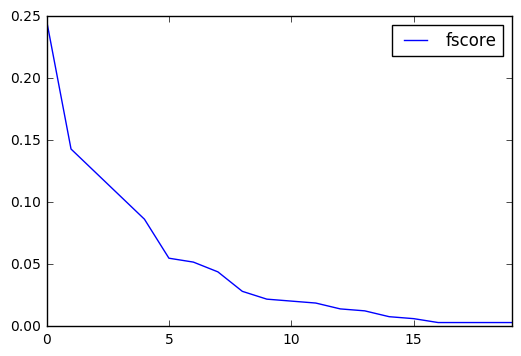

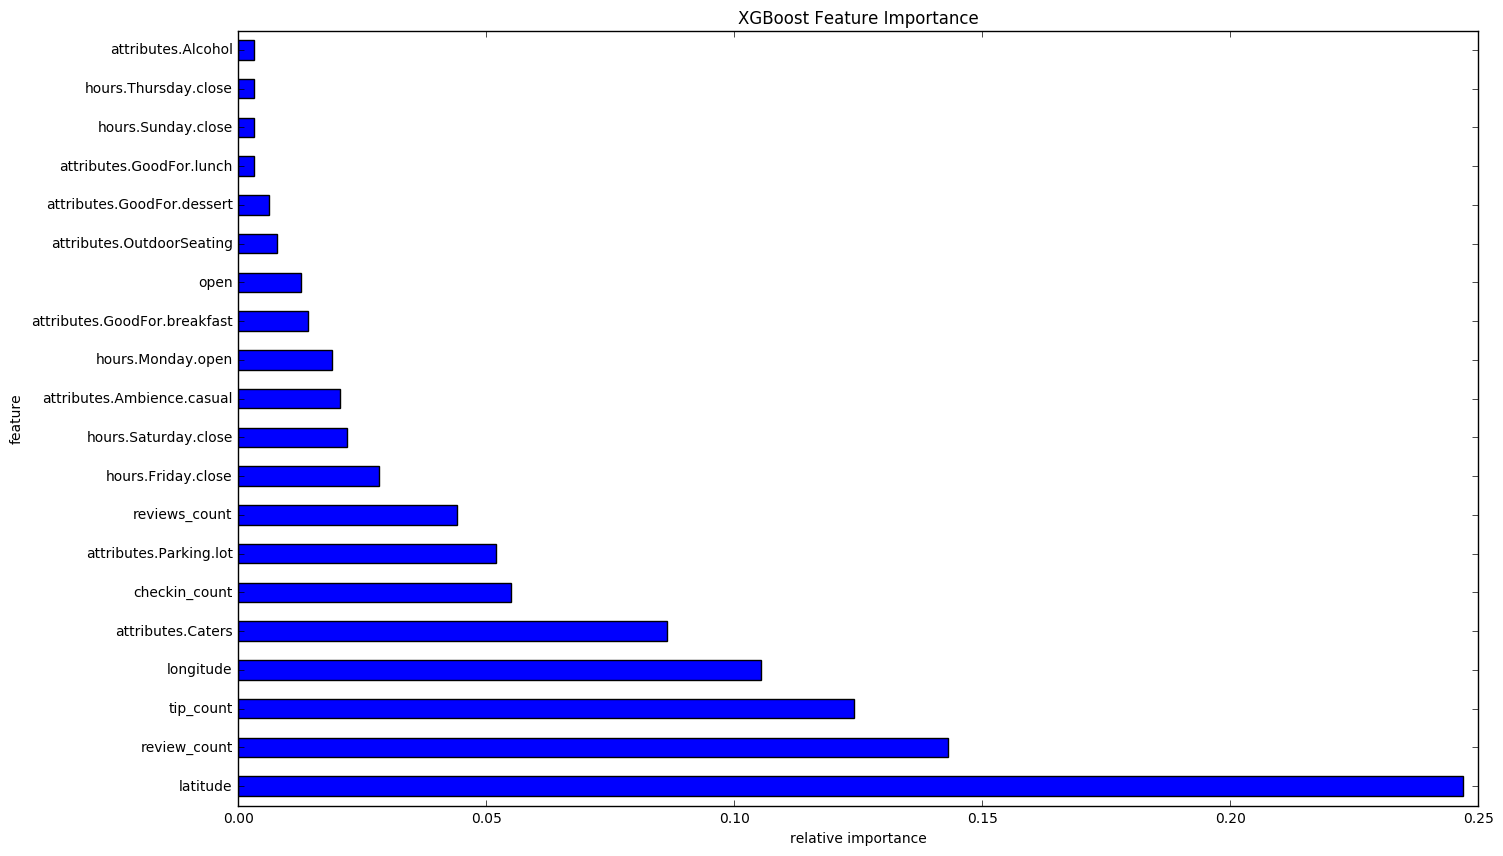

In [60]:
from matplotlib import pylab as plt
all_df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

In [62]:
dtest = xgb.DMatrix(X_test)
ans = gbdt.predict(dtest)
r_square=metrics.r2_score(y_test, ans, sample_weight=None, multioutput='uniform_average')
MSE=metrics.mean_squared_error(y_test, ans)
print('r_square is %s,MSE is %s'%(r_square,MSE))

r_square is 0.0,MSE is 0.00974609710867


## chose one

In [64]:
number=20
X_test=all_business[number:number+1]
features = list(X_test.columns[5:96])
X_test = X_test[features]
y_test=X_test['stars']
del X_test['stars']
all_business.drop(all_business.index[[number]],inplace=True)

In [65]:
features = list(all_business.columns[5:96])
X_train = all_business[features]
del X_train['stars']
y_train =all_business['stars']

atrribut is reviews_count 

stars initial is [ 4.49852848] 

value is 2 , result is 4.498461
value is 8 , result is 4.498461
value is 11 , result is 4.498461
value is 12 , result is 4.498461
value is 17 , result is 4.498528
value is 33 , result is 4.498528
value is 39 , result is 4.498528
value is 43 , result is 4.497008
value is 51 , result is 4.497124
value is 61 , result is 4.497124
value is 62 , result is 4.495679
value is 63 , result is 4.495679
value is 70 , result is 4.495679
value is 90 , result is 4.495679
value is 97 , result is 4.495679
value is 125 , result is 4.495679
value is 128 , result is 4.495679
value is 199 , result is 4.495679
value is 239 , result is 4.495679
value is 259 , result is 4.495679
value is 273 , result is 4.495679
value is 306 , result is 4.495679
value is 380 , result is 4.495679
value is 383 , result is 4.495679
value is 770 , result is 4.495679
delta max is [ 0.] 

-------------------------------------------
atrribut is hours.Saturday.close 

stars 

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x00000247DC823A20>>
Traceback (most recent call last):
  File "C:\Users\18791\Anaconda3\lib\site-packages\xgboost\core.py", line 368, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


value is 0 , result is 4.494109
value is 1 , result is 4.495126
value is 2 , result is 4.495126
delta max is [ 0.00101662] 

-------------------------------------------
atrribut is hours.Thursday.close 

stars initial is [ 4.49512577] 

value is 14 , result is 4.497574
value is 16 , result is 4.496367
value is 18 , result is 4.496367
value is 19 , result is 4.496367
value is 20 , result is 4.495126
value is 21 , result is 4.495126
value is 22 , result is 4.495126
value is 25 , result is 4.495126
delta max is [ 0.00244808] 

-------------------------------------------
atrribut is hours.Sunday.close 

stars initial is [ 4.49512577] 

value is 13 , result is 4.493710
value is 14 , result is 4.493710
value is 15 , result is 4.493710
value is 16 , result is 4.493710
value is 17 , result is 4.493710
value is 18 , result is 4.495109
value is 19 , result is 4.495109
value is 20 , result is 4.495109
value is 21 , result is 4.495109
value is 22 , result is 4.495109
value is 25 , result is 4.4951

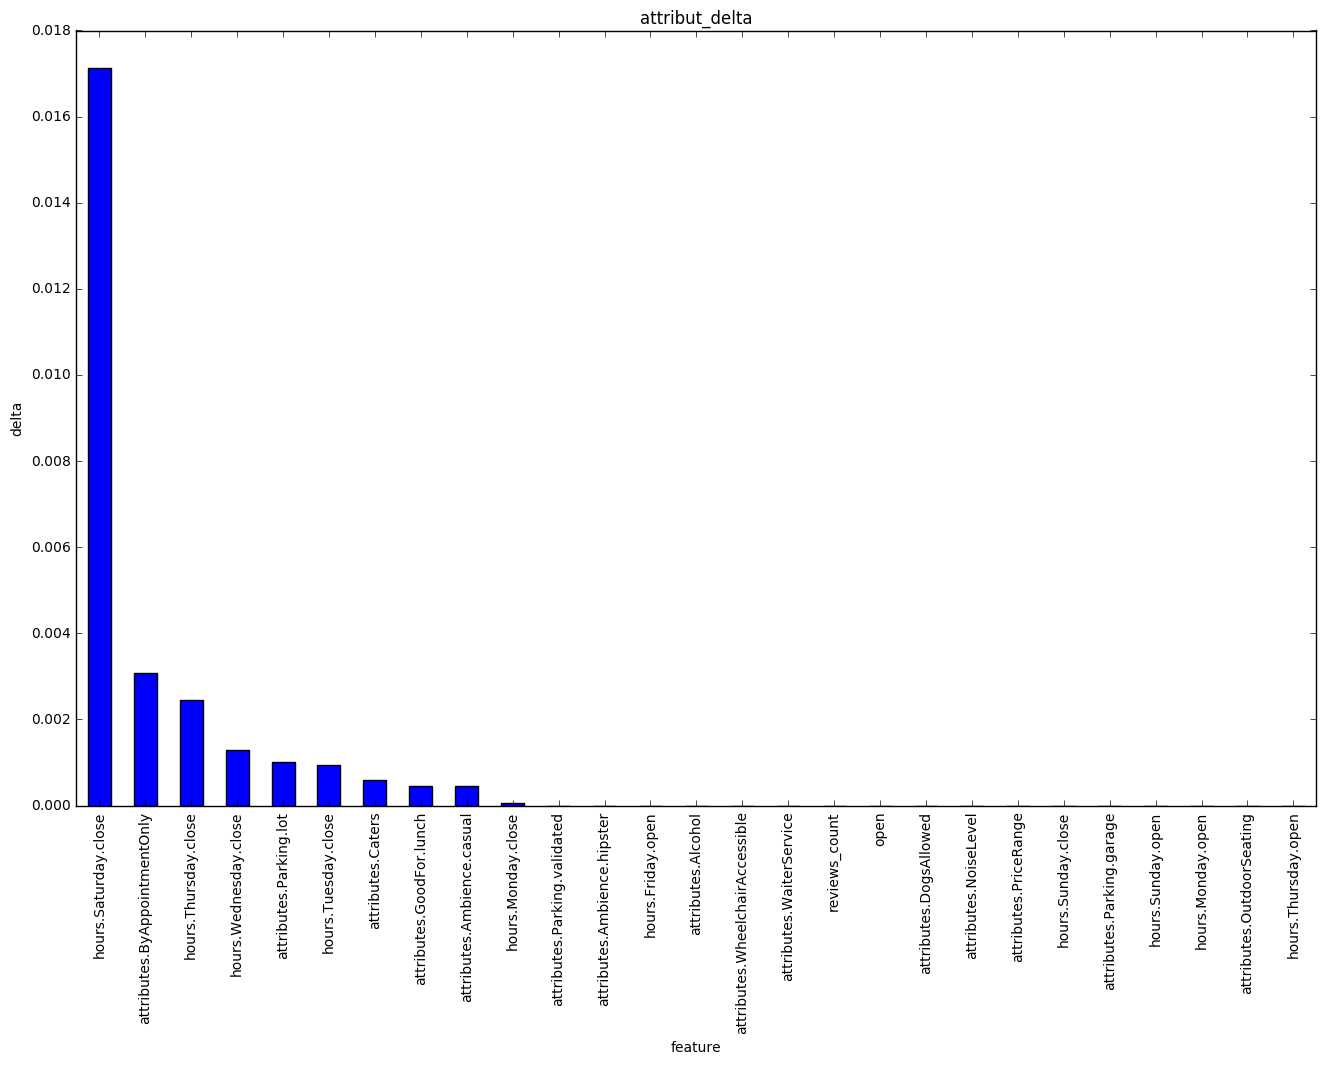

In [66]:
from sklearn import cross_validation, metrics
from matplotlib import pylab as plt
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(50)
feature=df['feature']
attribut_delta=[]
for i in feature[6:]:
    value=sorted(list(all_business[i].value_counts().index))
    value_init=X_test[i]
    dtest = xgb.DMatrix(X_test)
    ans = gbdt.predict(dtest)
    star_init=ans
    print('atrribut is %s \n'%i)
    print('stars initial is %s \n'%star_init)
    maxi=0
    for j in value:
        X_test[i]=j
        dtest = xgb.DMatrix(X_test)
        ans = gbdt.predict(dtest)
        if ans>maxi:
            maxi=ans
        print('value is %d'%j,',','result is %f'%ans)
    delta=maxi-star_init
    X_test[i]=value_init
    attribut_delta.append((i,delta[0]))
    print('delta max is %s \n'%delta)
    print('-------------------------------------------')

df = pd.DataFrame(attribut_delta, columns=['feature', 'delta'])
df=df.sort_values(by='delta',ascending=False).head(30)

plt.figure()
df.plot(kind='bar', x='feature', y='delta', legend=False, figsize=(16, 10))
plt.title('attribut_delta')
plt.ylabel('delta')
plt.gcf().savefig('attribut_delta.png')
plt.show()

# 2.2mauvais category vegeterian

In [67]:
mauvais_category_vegeterian=pd.read_csv('{}/category/mauvais_category_vegeterian.csv'.format(SHARED_FOLDER))
all_business=mauvais_category_vegeterian
del all_business['Unnamed: 0']
del all_business['avg_review_stars']
all_business

,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,stars,...,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,reviews_count,tip_count,checkin_count,category,category1,labels
0,"{'Delivery': False, 'Has TV': True, 'Alcohol':...",3zn5yjALes8-fxLvpO7_-A,"['Vegetarian', 'Vietnamese', 'Restaurants', 1]",Phoenix,"{'Saturday': {'close': '21:30', 'open': '10:30...",33.478016,-112.254559,True,107,4.0,...,21,10,25,25,103,35,410,Vegetarian,Vegeterian,0
1,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",uIDdneARsmwPLebKrwMtBw,"['Vegetarian', 'American (New)', 'Mediterranea...",Gilbert,"{'Saturday': {'close': '22:00', 'open': '11:00...",33.306300,-111.759311,True,196,4.0,...,21,11,21,11,178,68,833,Vegetarian,Vegeterian,0
2,"{'Delivery': False, 'Has TV': True, 'Noise Lev...",5fqbCefPHwNrCzuxnhCHgg,"['Vegetarian', 'African', 'Ethiopian', 'Restau...",Gilbert,"{'Saturday': {'close': '21:00', 'open': '16:00...",33.333655,-111.806298,False,45,3.5,...,21,16,21,16,51,7,14,Vegetarian,Vegeterian,0
3,"{'Delivery': True, 'Has TV': True, 'Alcohol': ...",00xD3o61AjrGOpEHiGPEwg,"['Vegetarian', 'Latin American', 'Mexican', 'R...",Tempe,"{'Saturday': {'close': '22:00', 'open': '11:00...",33.421611,-111.950561,True,25,4.0,...,22,11,22,11,17,5,64,Vegetarian,Vegeterian,0
4,"{'Delivery': False, 'Has TV': True, 'Alcohol':...",sb4wU69LkCtC6Axqcd34WQ,"['Vegetarian', 'Mexican', 'Restaurants', 1]",Scottsdale,"{'Saturday': {'close': '23:00', 'open': '11:00...",33.527709,-111.926973,True,469,3.5,...,22,11,22,11,425,84,1847,Vegetarian,Vegeterian,0
5,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",NqA43LG4PCPEDQT672zMNA,"['Vegetarian', 'American (New)', 'Mediterranea...",Mesa,"{'Saturday': {'close': '22:00', 'open': '10:30...",33.385080,-111.756375,True,95,4.0,...,22,10,22,10,86,25,364,Vegetarian,Vegeterian,0
6,"{'Corkage': False, 'Wheelchair Accessible': Tr...",w19cemjVR8u02PgjFpJ7Mw,"['Vegetarian', 'American (New)', 'Mediterranea...",Phoenix,"{'Saturday': {'close': '22:00', 'open': '10:30...",33.495483,-111.988372,True,300,4.0,...,22,10,22,10,276,75,1472,Vegetarian,Vegeterian,0
7,"{'Delivery': True, 'Has TV': False, 'Alcohol':...",RFmX3dUcMs50rHy5jfpsCQ,"['Vegetarian', 'Asian Fusion', 'Vegan', 'Resta...",Scottsdale,"{'Saturday': {'close': '21:00', 'open': '07:00...",33.584014,-111.922269,True,42,4.0,...,21,7,21,7,39,7,166,Vegetarian,Vegeterian,0
8,"{'Delivery': True, 'Has TV': False, 'Alcohol':...",RFmX3dUcMs50rHy5jfpsCQ,"['Vegetarian', 'Asian Fusion', 'Vegan', 'Resta...",Scottsdale,"{'Saturday': {'close': '21:00', 'open': '07:00...",33.584014,-111.922269,True,42,4.0,...,21,7,21,7,39,7,166,Vegan,Vegeterian,0
9,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",-JL0CWSLkkzFHZXlctnf8A,"['Vegetarian', 'Buffets', 'Salad', 'Restaurant...",Tempe,"{'Saturday': {'close': '22:00', 'open': '11:00...",33.393496,-111.914905,True,110,4.0,...,21,11,21,11,109,45,622,Vegetarian,Vegeterian,0


# 3.1bon category mexican

In [79]:
bon_category_mexican=pd.read_csv('{}/category/bon_category_mexican.csv'.format(SHARED_FOLDER))
all_business=bon_category_mexican
del all_business['Unnamed: 0']
del all_business['avg_review_stars']
all_business

,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,stars,...,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,reviews_count,tip_count,checkin_count,category,category1,labels
0,"{'Delivery': False, 'Has TV': True, 'Alcohol':...",QBoynogVWpl44LglOEIYhw,"['Tex-Mex', 'Restaurants', 1]",Tempe,{},33.414355,-111.926294,True,46,3.5,...,25,25,25,25,46,9,150,Tex-Mex,mexican,1
1,"{'Delivery': False, 'Has TV': True, 'Alcohol':...",rAb_wfdKKPPbcIysjYcW4A,"['Mexican', 'Restaurants', 1]",Phoenix,{},33.450927,-112.021199,True,13,4.0,...,25,25,25,25,12,2,22,Mexican,mexican,1
2,"{'Take-out': True, 'Has TV': True, 'Alcohol': ...",vGI3QO3wDBuQ2fPXVJmL9A,"['Mexican', 'Restaurants', 1]",Mesa,{},33.422290,-111.737502,True,5,4.0,...,25,25,25,25,5,6,22,Mexican,mexican,1
3,"{'Take-out': True, 'Has TV': False, 'Alcohol':...",ATeF8pmKd50Xx6Nkd_BsXw,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Phoenix,"{'Saturday': {'close': '01:00', 'open': '07:00...",33.611060,-112.111991,True,11,3.5,...,0,7,0,7,9,2,37,Mexican,mexican,1
4,"{'Take-out': True, 'Has TV': False, 'Alcohol':...",ATeF8pmKd50Xx6Nkd_BsXw,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Phoenix,"{'Saturday': {'close': '01:00', 'open': '07:00...",33.611060,-112.111991,True,11,3.5,...,0,7,0,7,9,2,37,Tex-Mex,mexican,1
5,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",7Y1lfzFkwBRoMZKIMMeZMw,"['Fast Food', 'Mexican', 'Restaurants', 1]",Peoria,"{'Saturday': {'close': '22:00', 'open': '10:00...",33.711978,-112.274706,True,23,3.5,...,22,10,22,10,18,4,43,Mexican,mexican,1
6,"{'Delivery': True, 'Has TV': True, 'Alcohol': ...",VQmgq4Dwwej5AwnHBmDIAg,"['American (Traditional)', 'Mexican', 'Chinese...",Phoenix,"{'Saturday': {'close': '16:00', 'open': '06:00...",33.451615,-112.085725,True,69,4.5,...,18,6,18,6,61,15,88,Mexican,mexican,1
7,"{'Delivery': False, 'Has TV': True, 'Alcohol':...",8gzwqbiqJ6126_myoDchGw,"['Mexican', 'Restaurants', 1]",Apache Junction,"{'Saturday': {'close': '21:00', 'open': '08:00...",33.412388,-111.551096,True,77,3.5,...,20,11,20,11,80,18,232,Mexican,mexican,1
8,"{'Delivery': False, 'Has TV': True, 'Alcohol':...",5U8tIBprXfTYCKzMLlIA7w,"['Mexican', 'Restaurants', 1]",Surprise,"{'Saturday': {'close': '00:00', 'open': '06:00...",33.623379,-112.391756,True,60,3.5,...,0,6,0,6,51,16,128,Mexican,mexican,1
9,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",qlrZzAktK8wODSHxhLEK7w,"['Mexican', 'Restaurants', 1]",Phoenix,"{'Saturday': {'close': '20:00', 'open': '10:30...",33.508989,-112.066999,True,264,3.5,...,20,10,20,10,246,41,321,Mexican,mexican,1


## fearture and performance

In [80]:
features = list(all_business.columns[5:96])
X = all_business[features]
del X['stars']
y =all_business['stars']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.05, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)
#do_metrics(y_test, ans)

[('latitude', 3510), ('longitude', 3459), ('review_count', 1846), ('checkin_count', 1750), ('tip_count', 1101), ('reviews_count', 953), ('hours.Friday.open', 471), ('attributes.Alcohol', 443), ('hours.Friday.close', 410), ('attributes.Caters', 331), ('attributes.Ambience.casual', 302), ('hours.Sunday.close', 300), ('attributes.OutdoorSeating', 284), ('hours.Monday.close', 275), ('attributes.NoiseLevel', 257), ('attributes.WaiterService', 253), ('attributes.WheelchairAccessible', 250), ('open', 239), ('attributes.WiFi', 235), ('attributes.Parking.lot', 225), ('hours.Monday.open', 223), ('hours.Sunday.open', 213), ('hours.Saturday.close', 212), ('hours.Saturday.open', 196), ('attributes.PriceRange', 167), ('attributes.Ambience.divey', 161), ('attributes.GoodFor.lunch', 159), ('hours.Thursday.close', 144), ('attributes.DriveThru', 140), ('attributes.DogsAllowed', 117), ('attributes.TakesReservations', 116), ('attributes.GoodFor.dinner', 111), ('attributes.GoodFor.brunch', 109), ('attribut

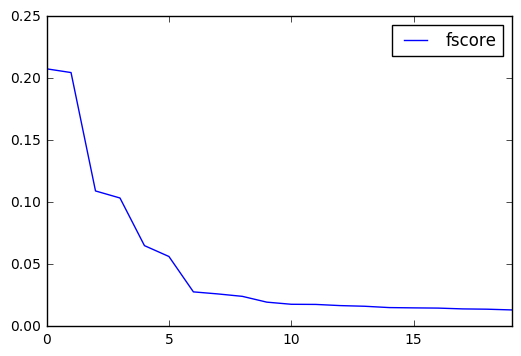

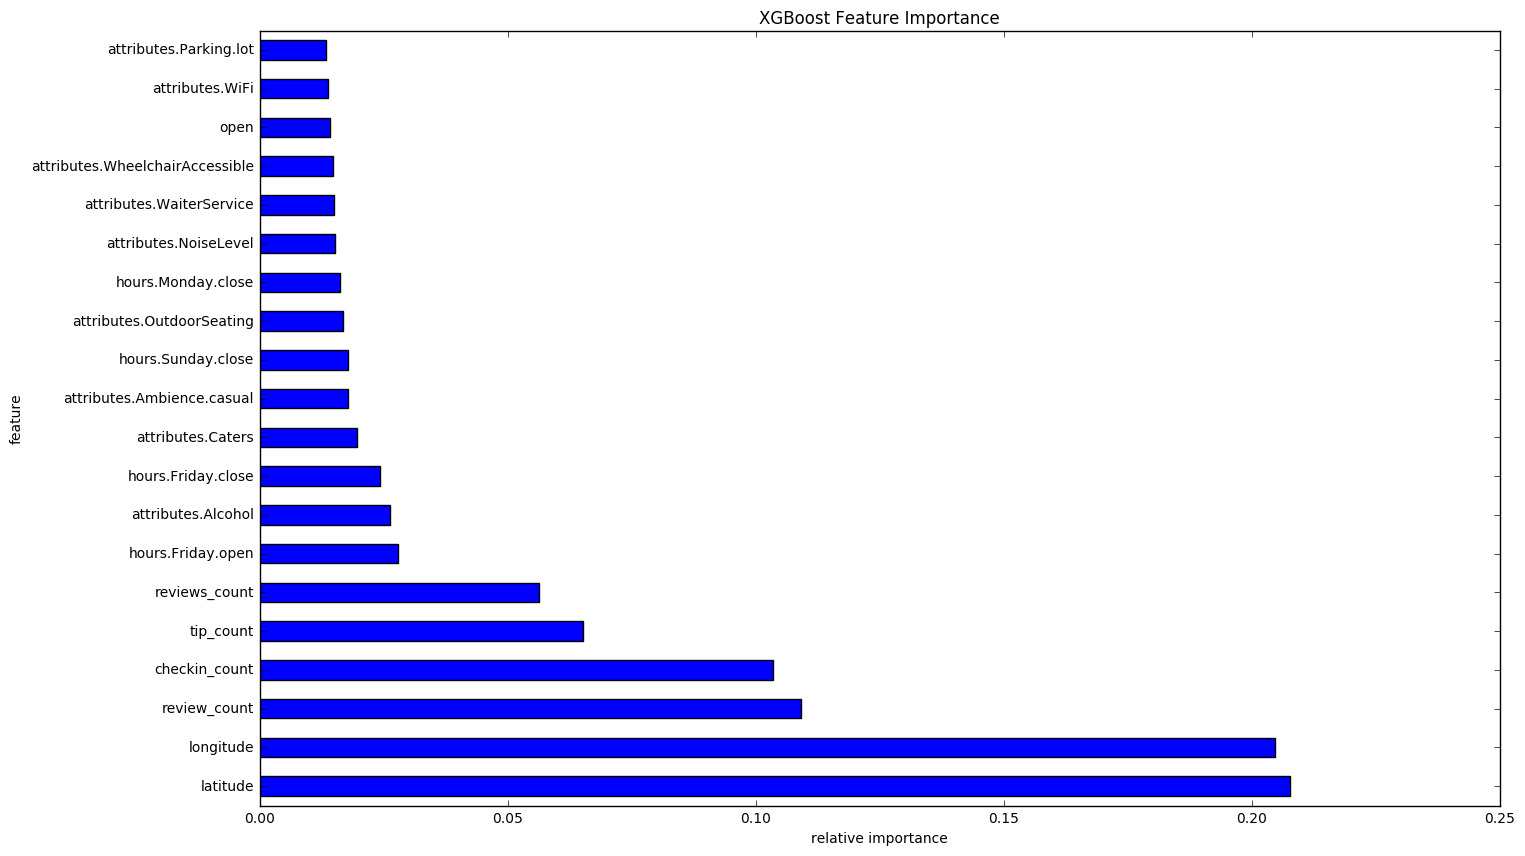

In [81]:
from matplotlib import pylab as plt
all_df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

In [82]:
dtest = xgb.DMatrix(X_test)
ans = gbdt.predict(dtest)
r_square=metrics.r2_score(y_test, ans, sample_weight=None, multioutput='uniform_average')
MSE=metrics.mean_squared_error(y_test, ans)
print('r_square is %s,MSE is %s'%(r_square,MSE))

r_square is 0.10548148122,MSE is 0.132919082452


## chose one

atrribut is attributes.Alcohol 

stars initial is [ 3.59968233] 

value is 0 , result is 3.634926
value is 1 , result is 3.687963
value is 2 , result is 3.593099
value is 3 , result is 3.599682
delta max is [ 0.08828044] 

-------------------------------------------
atrribut is hours.Friday.close 

stars initial is [ 3.59968233] 

value is 0 , result is 3.659735
value is 1 , result is 3.659735
value is 2 , result is 3.659735
value is 3 , result is 3.659735
value is 4 , result is 3.659735
value is 5 , result is 3.657089
value is 6 , result is 3.652003
value is 7 , result is 3.652003
value is 9 , result is 3.652003
value is 14 , result is 3.655510
value is 15 , result is 3.655510
value is 16 , result is 3.655510
value is 17 , result is 3.655510
value is 18 , result is 3.659000
value is 19 , result is 3.656786
value is 20 , result is 3.643898
value is 21 , result is 3.645764
value is 22 , result is 3.600710
value is 23 , result is 3.599682
value is 25 , result is 3.599682
delta max is [ 0

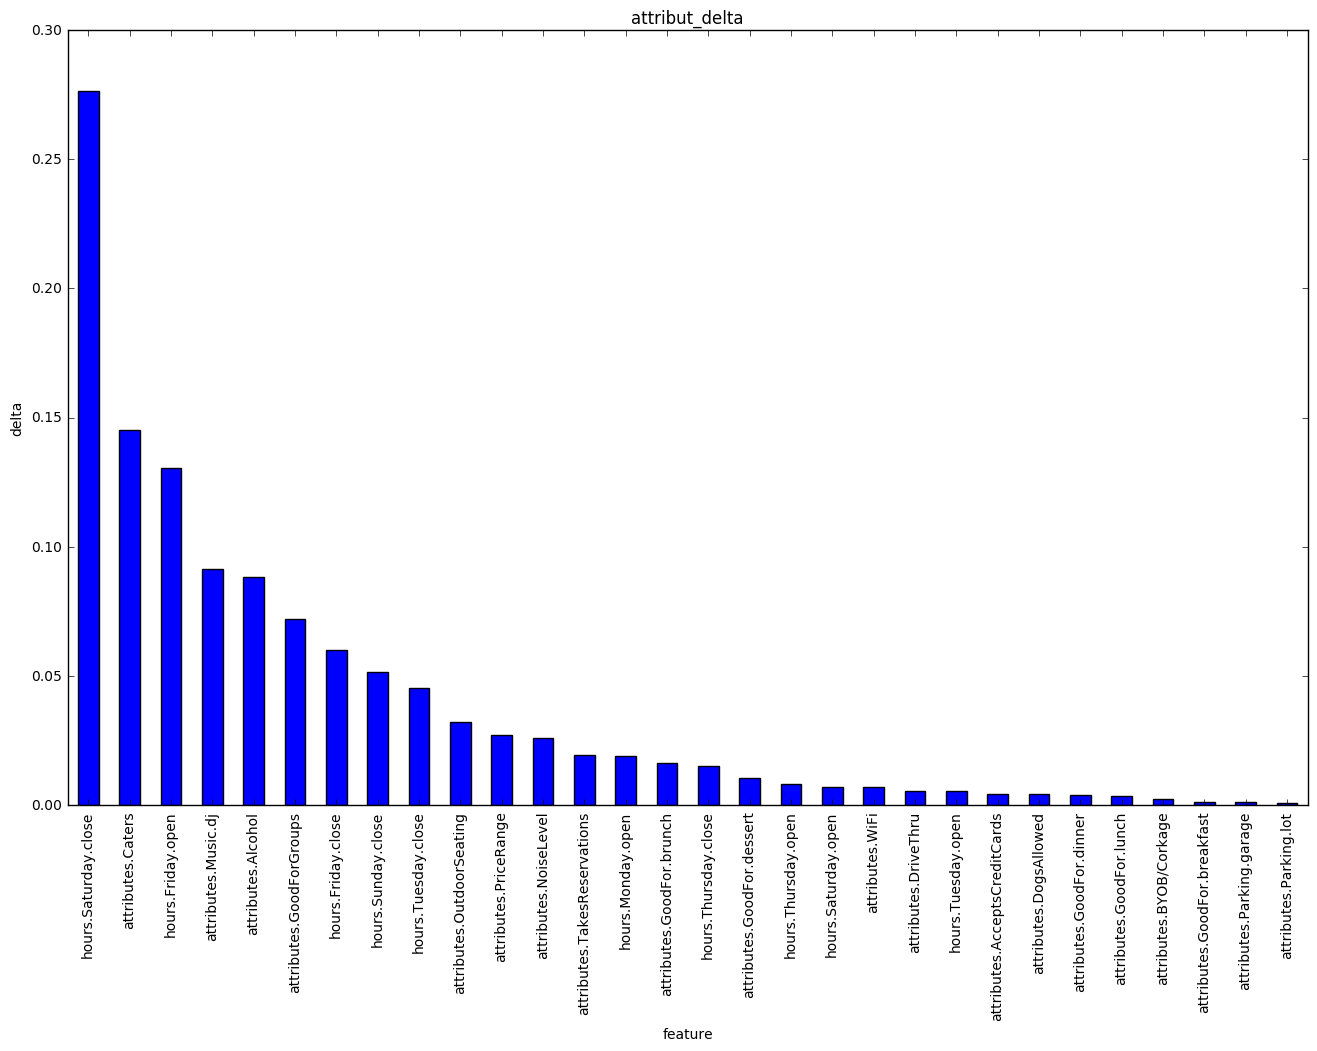

In [83]:
number=20
X_test=all_business[number:number+1]
features = list(X_test.columns[5:96])
X_test = X_test[features]
y_test=X_test['stars']
del X_test['stars']
all_business.drop(all_business.index[[number]],inplace=True)
features = list(all_business.columns[5:96])
X_train = all_business[features]
del X_train['stars']
y_train =all_business['stars']

from sklearn import cross_validation, metrics
from matplotlib import pylab as plt
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(50)
feature=df['feature']
attribut_delta=[]
for i in feature[6:]:
    value=sorted(list(all_business[i].value_counts().index))
    value_init=X_test[i]
    dtest = xgb.DMatrix(X_test)
    ans = gbdt.predict(dtest)
    star_init=ans
    print('atrribut is %s \n'%i)
    print('stars initial is %s \n'%star_init)
    maxi=0
    for j in value:
        X_test[i]=j
        dtest = xgb.DMatrix(X_test)
        ans = gbdt.predict(dtest)
        if ans>maxi:
            maxi=ans
        print('value is %d'%j,',','result is %f'%ans)
    delta=maxi-star_init
    X_test[i]=value_init
    attribut_delta.append((i,delta[0]))
    print('delta max is %s \n'%delta)
    print('-------------------------------------------')

df = pd.DataFrame(attribut_delta, columns=['feature', 'delta'])
df=df.sort_values(by='delta',ascending=False).head(30)

plt.figure()
df.plot(kind='bar', x='feature', y='delta', legend=False, figsize=(16, 10))
plt.title('attribut_delta')
plt.ylabel('delta')
plt.gcf().savefig('attribut_delta.png')
plt.show()

# 3.2mauvais category mexican

In [74]:
mauvais_category_mexican=pd.read_csv('{}/category/mauvais_category_mexican.csv'.format(SHARED_FOLDER))
all_business=mauvais_category_mexican
del all_business['Unnamed: 0']
del all_business['avg_review_stars']
all_business

,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,stars,...,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,reviews_count,tip_count,checkin_count,category,category1,labels
0,"{'Take-out': True, 'Has TV': False, 'Alcohol':...",36iFlBCnKNOyWFFXDjF0Hg,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Mesa,"{'Saturday': {'close': '23:00', 'open': '10:30...",33.379200,-111.785500,True,5,2.5,...,22,10,22,10,5,7,55,Mexican,mexican,0
1,"{'Take-out': True, 'Has TV': False, 'Alcohol':...",36iFlBCnKNOyWFFXDjF0Hg,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Mesa,"{'Saturday': {'close': '23:00', 'open': '10:30...",33.379200,-111.785500,True,5,2.5,...,22,10,22,10,5,7,55,Tex-Mex,mexican,0
2,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",QWgIp-p301PjotY2il07Bw,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Gilbert,{},33.234577,-111.722688,True,9,3.0,...,25,25,25,25,8,4,29,Mexican,mexican,0
3,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",QWgIp-p301PjotY2il07Bw,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Gilbert,{},33.234577,-111.722688,True,9,3.0,...,25,25,25,25,8,4,29,Tex-Mex,mexican,0
4,"{'Delivery': True, 'Has TV': True, 'Alcohol': ...",LDtftda8zS1mPM12rSQN8A,"['Mexican', 'Restaurants', 1]",Scottsdale,"{'Saturday': {'close': '22:00', 'open': '11:00...",33.674453,-111.888680,True,52,3.0,...,21,11,21,11,48,7,106,Mexican,mexican,0
5,"{'Delivery': False, 'Take-out': True, 'Has TV'...",4jxKmU2No9hGWCZuYPjeLQ,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Phoenix,"{'Saturday': {'close': '02:00', 'open': '07:00...",33.468980,-112.221150,True,5,2.5,...,1,7,1,7,5,4,17,Mexican,mexican,0
6,"{'Delivery': False, 'Take-out': True, 'Has TV'...",4jxKmU2No9hGWCZuYPjeLQ,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Phoenix,"{'Saturday': {'close': '02:00', 'open': '07:00...",33.468980,-112.221150,True,5,2.5,...,1,7,1,7,5,4,17,Tex-Mex,mexican,0
7,"{'Delivery': False, 'Has TV': True, 'Alcohol':...",hXTKcUf44oTTQAbhh4iC7Q,"['Mexican', 'Restaurants', 1]",Buckeye,{},33.406692,-112.590908,True,25,2.5,...,25,25,25,25,23,7,40,Mexican,mexican,0
8,"{'Delivery': False, 'Has TV': True, 'Alcohol':...",0Jouvs4G3d6CcG3pYGZ20A,"['Breakfast & Brunch', 'Mexican', 'Diners', 'R...",Phoenix,{},33.524003,-112.113041,True,24,2.5,...,25,25,25,25,21,3,47,Mexican,mexican,0
9,"{'Delivery': False, 'Take-out': True, 'Has TV'...",cx6ht6xrOwHpNhXVQtgxiQ,"['Mexican', 'Restaurants', 1]",Glendale,{},33.533049,-112.262036,False,12,3.0,...,25,25,25,25,11,2,7,Mexican,mexican,0


## feature and performance

In [75]:
features = list(all_business.columns[5:96])
X = all_business[features]
del X['stars']
y =all_business['stars']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.05, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)
#do_metrics(y_test, ans)

[('latitude', 3330), ('longitude', 2780), ('review_count', 1666), ('checkin_count', 1521), ('tip_count', 843), ('reviews_count', 804), ('hours.Friday.close', 414), ('attributes.NoiseLevel', 350), ('attributes.Ambience.casual', 337), ('attributes.WiFi', 307), ('attributes.Alcohol', 299), ('attributes.Caters', 271), ('attributes.OutdoorSeating', 260), ('hours.Friday.open', 254), ('open', 246), ('hours.Monday.close', 189), ('attributes.GoodFor.lunch', 184), ('attributes.WaiterService', 172), ('attributes.GoodFor.breakfast', 167), ('attributes.Parking.lot', 158), ('attributes.WheelchairAccessible', 153), ('attributes.HappyHour', 143), ('attributes.DriveThru', 142), ('attributes.GoodForGroups', 141), ('hours.Sunday.close', 138), ('hours.Saturday.open', 130), ('attributes.TakesReservations', 113), ('hours.Saturday.close', 113), ('hours.Sunday.open', 113), ('attributes.PriceRange', 106), ('attributes.AcceptsCreditCards', 105), ('attributes.Ambience.divey', 103), ('attributes.GoodForDancing', 

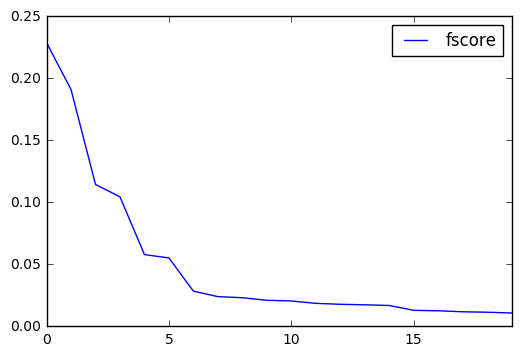

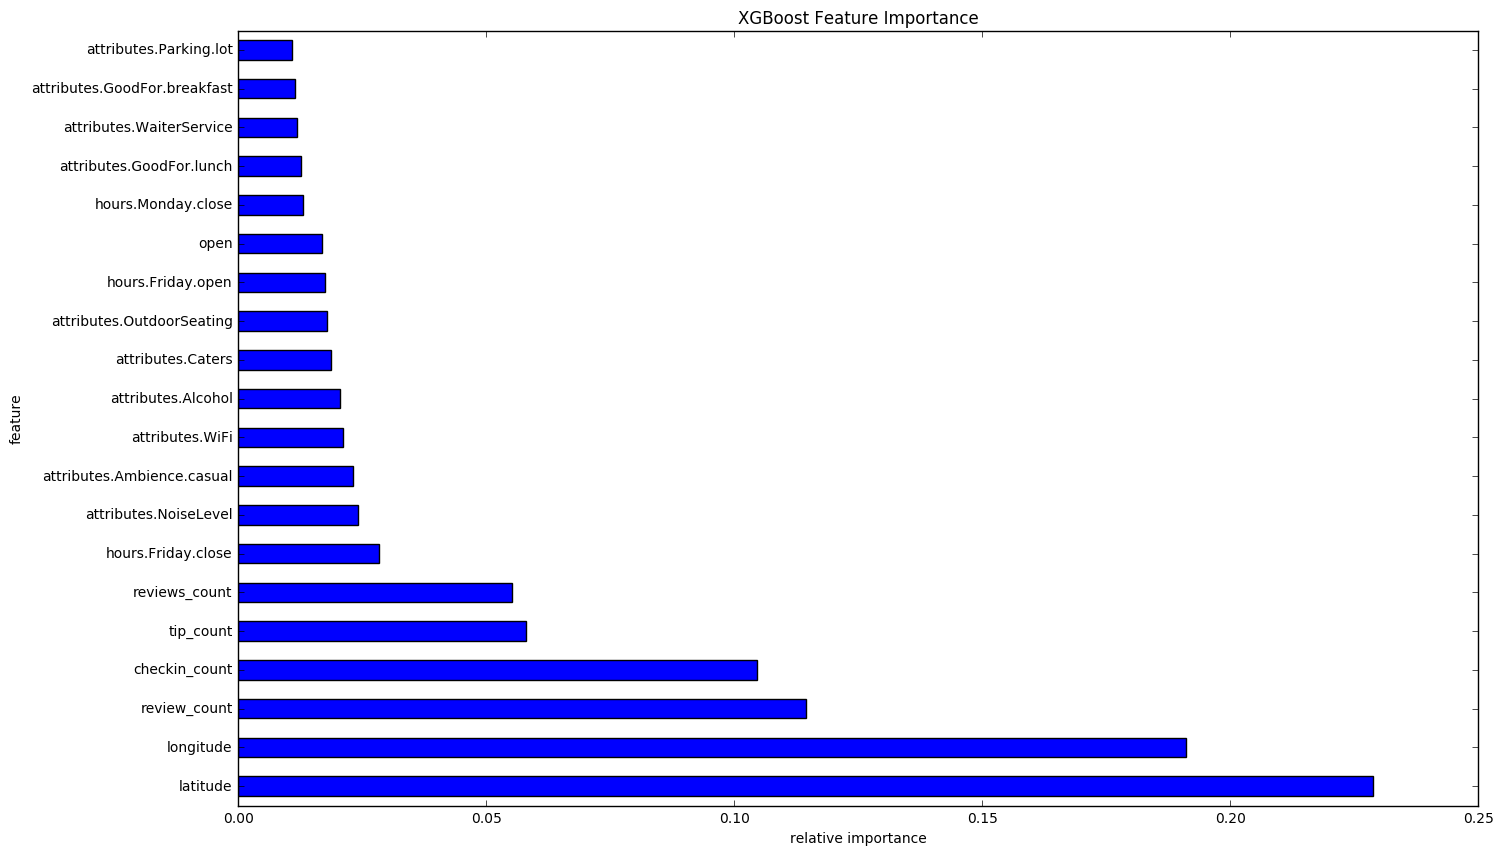

In [76]:
from matplotlib import pylab as plt
all_df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

In [77]:
dtest = xgb.DMatrix(X_test)
ans = gbdt.predict(dtest)
r_square=metrics.r2_score(y_test, ans, sample_weight=None, multioutput='uniform_average')
MSE=metrics.mean_squared_error(y_test, ans)
print('r_square is %s,MSE is %s'%(r_square,MSE))

r_square is 0.132772262262,MSE is 0.143815567504


## chose one

atrribut is hours.Friday.close 

stars initial is [ 2.51749277] 

value is 0 , result is 2.253840
value is 1 , result is 2.487935
value is 2 , result is 2.513453
value is 3 , result is 2.517493
value is 4 , result is 2.517493
value is 5 , result is 2.520598
value is 6 , result is 2.520598
value is 7 , result is 2.520598
value is 12 , result is 2.520598
value is 19 , result is 2.518788
value is 20 , result is 2.518788
value is 21 , result is 2.518180
value is 22 , result is 2.516457
value is 23 , result is 2.514829
value is 25 , result is 2.513582
delta max is [ 0.00310493] 

-------------------------------------------
atrribut is attributes.NoiseLevel 

stars initial is [ 2.51358247] 

value is 0 , result is 2.513582
value is 1 , result is 2.507830
value is 2 , result is 2.503983
value is 3 , result is 2.490686
value is 4 , result is 2.472499
delta max is [ 0.] 

-------------------------------------------
atrribut is attributes.Ambience.casual 

stars initial is [ 2.47249889] 

value 

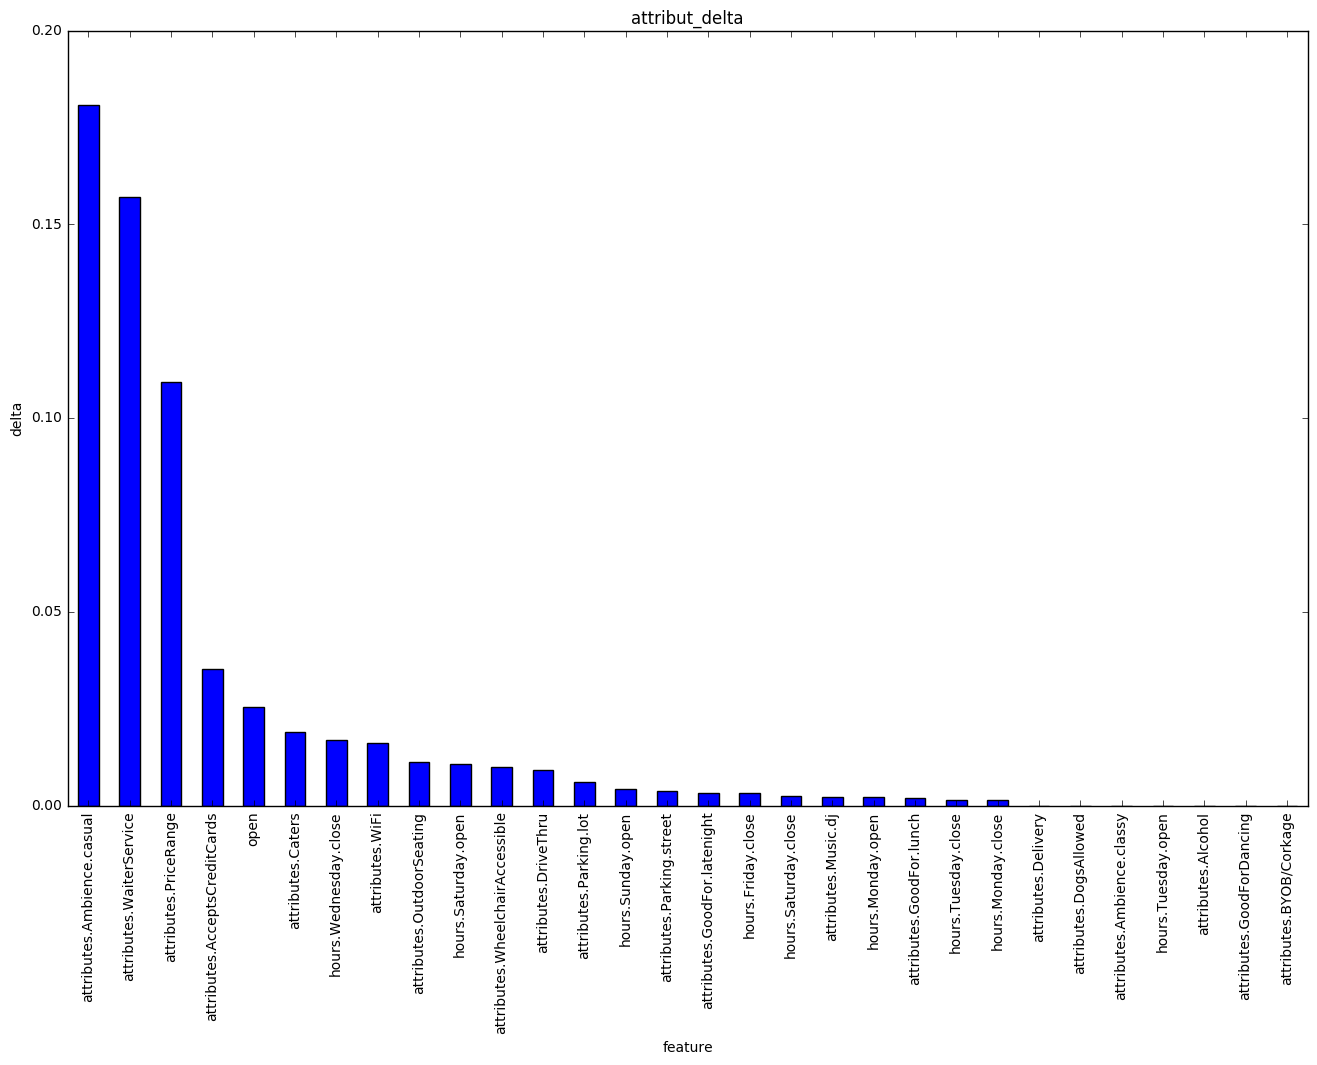

In [78]:
number=20
X_test=all_business[number:number+1]
features = list(X_test.columns[5:96])
X_test = X_test[features]
y_test=X_test['stars']
del X_test['stars']
all_business.drop(all_business.index[[number]],inplace=True)
features = list(all_business.columns[5:96])
X_train = all_business[features]
del X_train['stars']
y_train =all_business['stars']

from sklearn import cross_validation, metrics
from matplotlib import pylab as plt
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(50)
feature=df['feature']
attribut_delta=[]
for i in feature[6:]:
    value=sorted(list(all_business[i].value_counts().index))
    value_init=X_test[i]
    dtest = xgb.DMatrix(X_test)
    ans = gbdt.predict(dtest)
    star_init=ans
    print('atrribut is %s \n'%i)
    print('stars initial is %s \n'%star_init)
    maxi=0
    for j in value:
        X_test[i]=j
        dtest = xgb.DMatrix(X_test)
        ans = gbdt.predict(dtest)
        if ans>maxi:
            maxi=ans
        print('value is %d'%j,',','result is %f'%ans)
    delta=maxi-star_init
    X_test[i]=value_init
    attribut_delta.append((i,delta[0]))
    print('delta max is %s \n'%delta)
    print('-------------------------------------------')

df = pd.DataFrame(attribut_delta, columns=['feature', 'delta'])
df=df.sort_values(by='delta',ascending=False).head(30)

plt.figure()
df.plot(kind='bar', x='feature', y='delta', legend=False, figsize=(16, 10))
plt.title('attribut_delta')
plt.ylabel('delta')
plt.gcf().savefig('attribut_delta.png')
plt.show()

# 4.1bon_category_coffee

In [85]:
bon_category_coffee=pd.read_csv('{}/category/bon_category_coffee.csv'.format(SHARED_FOLDER))
all_business=bon_category_coffee
del all_business['Unnamed: 0']
del all_business['avg_review_stars']
all_business

,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,stars,...,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,reviews_count,tip_count,checkin_count,category,category1,labels
0,"{'Take-out': True, 'Alcohol': 'beer_and_wine',...",Kqn4J9NTgZdMAnV4HuYh5A,"['Food', 'Coffee & Tea', 1]",Phoenix,{},33.675854,-111.966734,False,62,4.5,...,25,25,25,25,62,15,171,Coffee & Tea,coffee,1
1,"{'Delivery': True, 'Has TV': False, 'Alcohol':...",9NoaYpTbEG2qn34kq7W3ww,"['American (Traditional)', 'Cafes', 'Restauran...",Scottsdale,"{'Saturday': {'close': '13:00', 'open': '08:00...",33.568525,-111.886316,True,20,4.5,...,14,8,14,8,20,7,50,Cafes,coffee,1
2,"{'Parking': {'lot': False, 'valet': False, 'st...",FIXe1CImoR3ldHvMGKObTQ,"['Food', 'Coffee & Tea', 1]",Phoenix,"{'Saturday': {'close': '21:00', 'open': '04:30...",33.670604,-112.117888,True,7,5.0,...,21,4,21,4,7,1,21,Coffee & Tea,coffee,1
3,"{'Parking': {'lot': True, 'valet': False, 'str...",yMkXrAbKr3C1BjXIj6CIzA,"['Food', 'Coffee & Tea', 1]",Chandler,"{'Saturday': {'close': '21:00', 'open': '05:30...",33.317435,-111.967971,True,24,4.0,...,21,4,21,4,22,14,406,Coffee & Tea,coffee,1
4,"{'Parking': {'lot': True, 'valet': False, 'str...",JRwi26gv3IxoXoRY8gIQ4A,"['Food', 'Coffee & Tea', 1]",Goodyear,{},33.465309,-112.341692,True,33,4.0,...,25,25,25,25,33,58,452,Coffee & Tea,coffee,1
5,"{'Parking': {'lot': False, 'valet': False, 'st...",_e49VDzW8syrBVZgKQkyXQ,"['Arts & Entertainment', 'Shopping', 'Food', '...",Mesa,"{'Saturday': {'close': '22:00', 'open': '10:00...",33.415377,-111.836051,True,12,5.0,...,19,7,19,7,10,4,12,Coffee & Tea,coffee,1
6,"{'Take-out': True, 'Has TV': False, 'Alcohol':...",o2BeeJmpf_J9EmC8HQoHRA,"['Food', 'Convenience Stores', 'American (New)...",Paradise Valley,"{'Saturday': {'close': '19:00', 'open': '07:00...",33.538847,-111.964173,True,18,4.0,...,19,7,19,7,16,4,48,Cafes,coffee,1
7,"{'Parking': {'lot': False, 'valet': False, 'st...",IG9S8954noz6PFWo7LSt_w,"['Food', 'Coffee & Tea', 1]",Mesa,"{'Saturday': {'close': '13:00', 'open': '08:00...",33.390921,-111.873090,True,5,4.0,...,20,6,20,6,6,5,26,Coffee & Tea,coffee,1
8,"{'Parking': {'lot': False, 'valet': False, 'st...",mFFwoeHzOwvmzolpGzAOhA,"['Food', 'Coffee & Tea', 1]",Tempe,"{'Saturday': {'close': '16:00', 'open': '06:30...",33.429944,-111.947814,True,12,4.5,...,16,6,16,6,12,2,19,Coffee & Tea,coffee,1
9,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",Uw3Mo5JSfAnxBLqX9AnbUQ,"['Food', 'Coffee & Tea', 'Cafes', 'Restaurants...",Scottsdale,"{'Saturday': {'close': '18:00', 'open': '07:00...",33.557293,-111.899459,True,164,4.0,...,18,7,18,7,155,36,435,Coffee & Tea,coffee,1


## feature and performance

In [86]:
features = list(all_business.columns[5:96])
X = all_business[features]
del X['stars']
y =all_business['stars']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.05, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)
#do_metrics(y_test, ans)

[('latitude', 3224), ('longitude', 2628), ('review_count', 1742), ('checkin_count', 1265), ('tip_count', 1040), ('reviews_count', 854), ('hours.Friday.close', 482), ('hours.Saturday.close', 440), ('hours.Sunday.close', 401), ('hours.Monday.close', 364), ('attributes.Alcohol', 315), ('hours.Friday.open', 290), ('hours.Sunday.open', 288), ('attributes.WiFi', 240), ('open', 228), ('hours.Saturday.open', 226), ('attributes.WheelchairAccessible', 224), ('hours.Monday.open', 207), ('attributes.OutdoorSeating', 186), ('attributes.Parking.lot', 181), ('attributes.PriceRange', 167), ('attributes.Ambience.casual', 157), ('attributes.NoiseLevel', 133), ('attributes.Delivery', 133), ('attributes.Caters', 118), ('attributes.GoodForGroups', 114), ('hours.Thursday.close', 113), ('attributes.Parking.street', 107), ('attributes.WaiterService', 95), ('attributes.GoodFor.brunch', 92), ('attributes.GoodFor.breakfast', 90), ('attributes.Smoking', 86), ('hours.Tuesday.close', 83), ('attributes.GoodFor.lunch

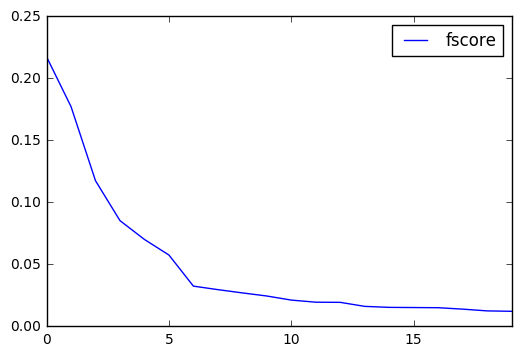

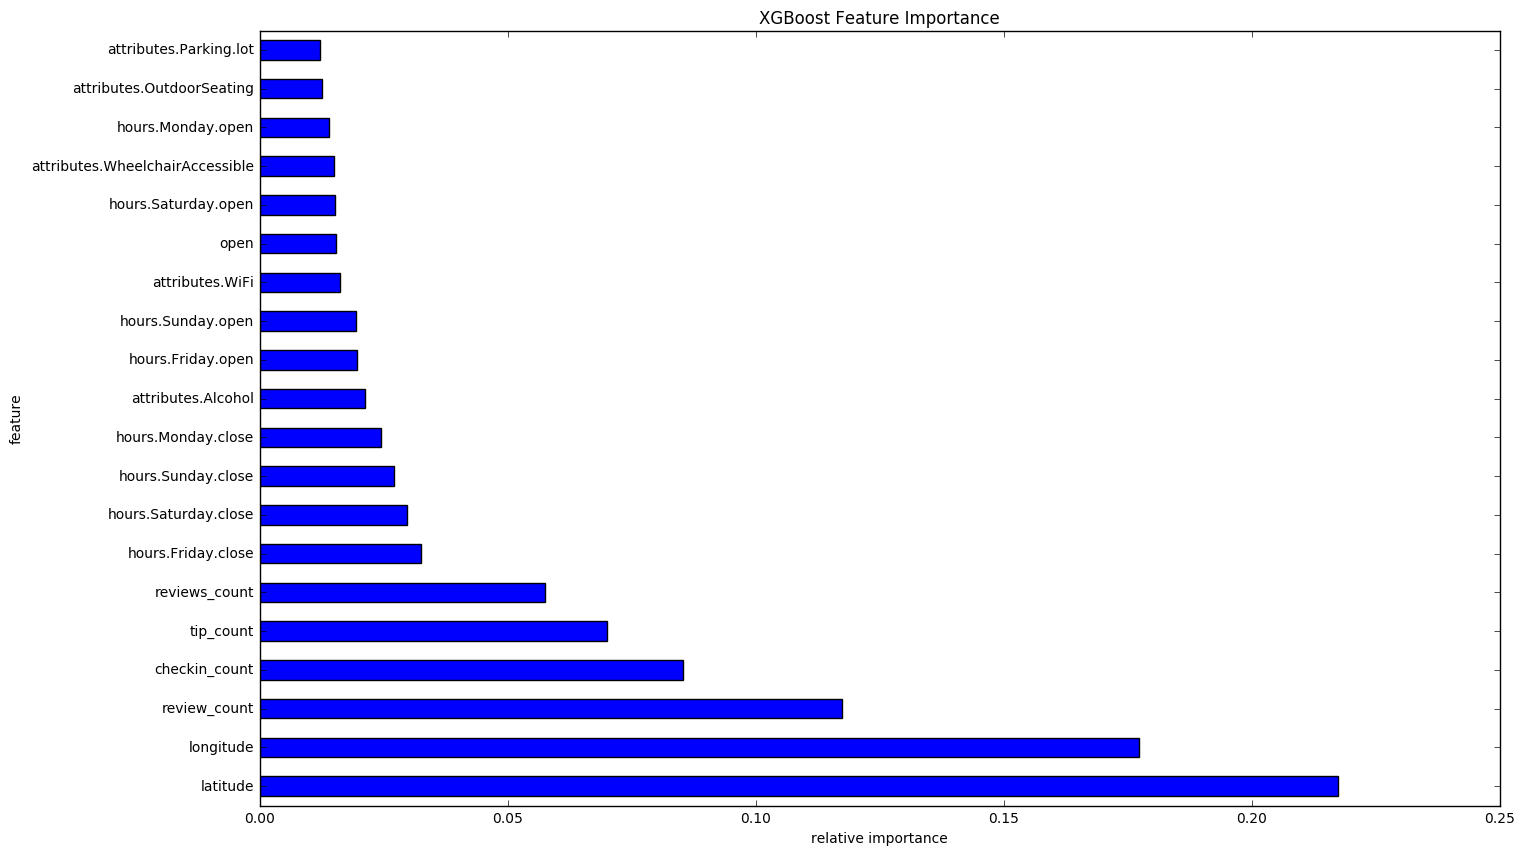

In [87]:
from matplotlib import pylab as plt
all_df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

In [88]:
dtest = xgb.DMatrix(X_test)
ans = gbdt.predict(dtest)
r_square=metrics.r2_score(y_test, ans, sample_weight=None, multioutput='uniform_average')
MSE=metrics.mean_squared_error(y_test, ans)
print('r_square is %s,MSE is %s'%(r_square,MSE))

r_square is 0.0628830067025,MSE is 0.0971479363808


## chose one

atrribut is hours.Sunday.close 

stars initial is [ 4.61501789] 

value is 0 , result is 4.613249
value is 4 , result is 4.613249
value is 11 , result is 4.613249
value is 12 , result is 4.613249
value is 13 , result is 4.616096
value is 14 , result is 4.578290
value is 15 , result is 4.576591
value is 16 , result is 4.597741
value is 17 , result is 4.615018
value is 18 , result is 4.615018
value is 19 , result is 4.608237
value is 20 , result is 4.606842
value is 21 , result is 4.606842
value is 22 , result is 4.607491
value is 23 , result is 4.607491
value is 25 , result is 4.607491
delta max is [ 0.00107861] 

-------------------------------------------
atrribut is hours.Friday.close 

stars initial is [ 4.60749102] 

value is 0 , result is 4.524776
value is 1 , result is 4.524776
value is 2 , result is 4.524776
value is 4 , result is 4.524776
value is 6 , result is 4.524776
value is 12 , result is 4.524776
value is 13 , result is 4.524776
value is 14 , result is 4.524776
value is 1

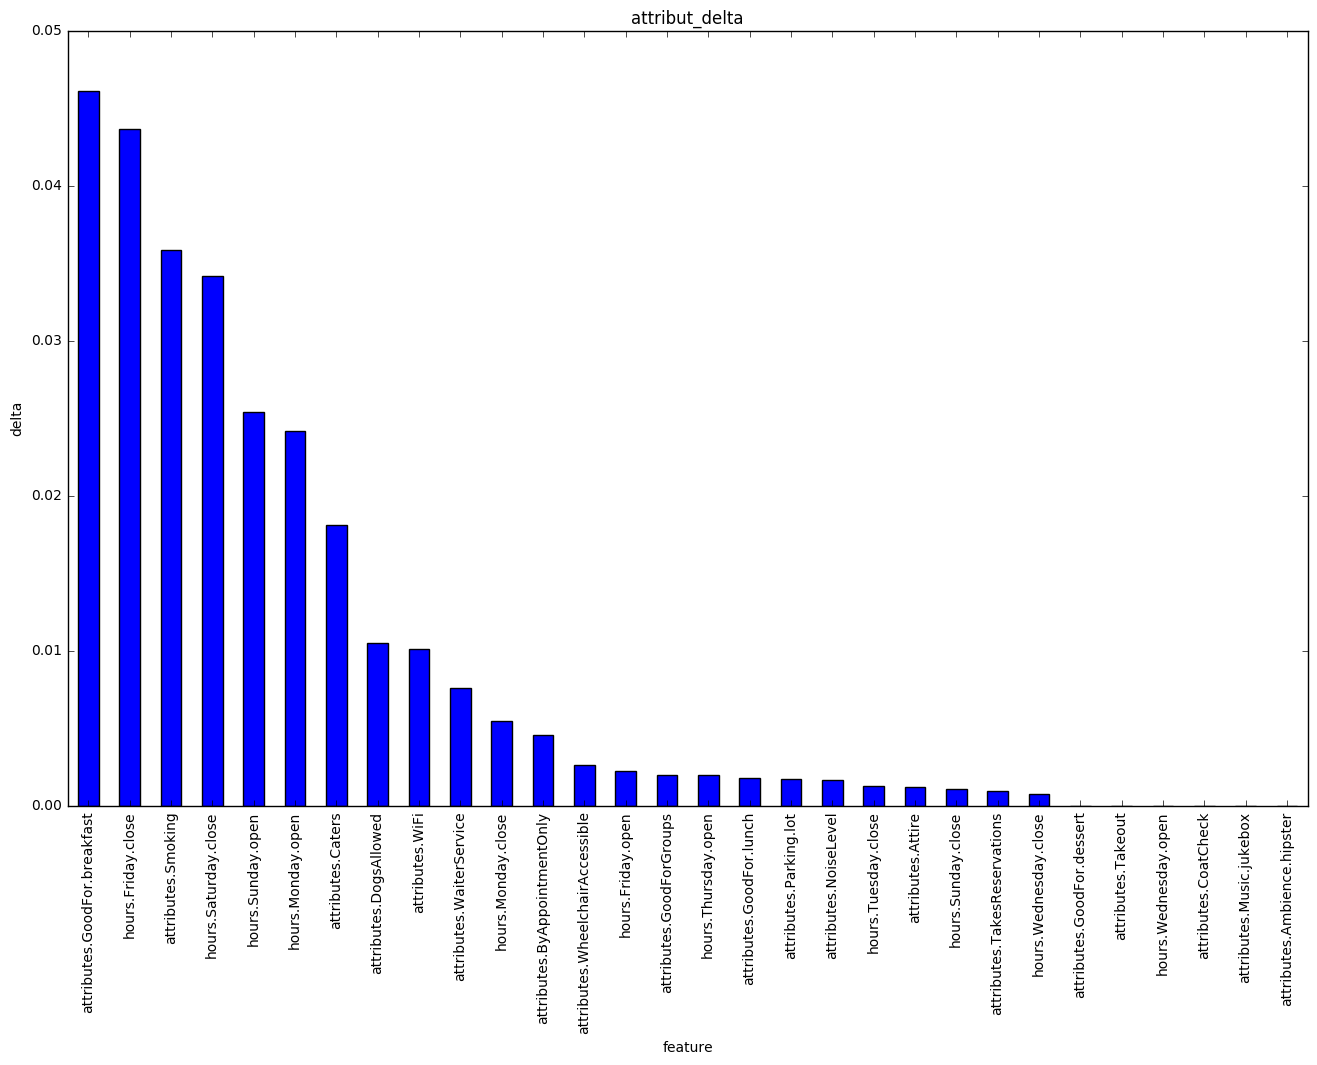

In [89]:
number=20
X_test=all_business[number:number+1]
features = list(X_test.columns[5:96])
X_test = X_test[features]
y_test=X_test['stars']
del X_test['stars']
all_business.drop(all_business.index[[number]],inplace=True)
features = list(all_business.columns[5:96])
X_train = all_business[features]
del X_train['stars']
y_train =all_business['stars']

from sklearn import cross_validation, metrics
from matplotlib import pylab as plt
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(50)
feature=df['feature']
attribut_delta=[]
for i in feature[6:]:
    value=sorted(list(all_business[i].value_counts().index))
    value_init=X_test[i]
    dtest = xgb.DMatrix(X_test)
    ans = gbdt.predict(dtest)
    star_init=ans
    print('atrribut is %s \n'%i)
    print('stars initial is %s \n'%star_init)
    maxi=0
    for j in value:
        X_test[i]=j
        dtest = xgb.DMatrix(X_test)
        ans = gbdt.predict(dtest)
        if ans>maxi:
            maxi=ans
        print('value is %d'%j,',','result is %f'%ans)
    delta=maxi-star_init
    X_test[i]=value_init
    attribut_delta.append((i,delta[0]))
    print('delta max is %s \n'%delta)
    print('-------------------------------------------')

df = pd.DataFrame(attribut_delta, columns=['feature', 'delta'])
df=df.sort_values(by='delta',ascending=False).head(30)

plt.figure()
df.plot(kind='bar', x='feature', y='delta', legend=False, figsize=(16, 10))
plt.title('attribut_delta')
plt.ylabel('delta')
plt.gcf().savefig('attribut_delta.png')
plt.show()

# 4.2mauvais category coffee

In [91]:
mauvais_category_coffee=pd.read_csv('{}/category/mauvais_category_coffee.csv'.format(SHARED_FOLDER))
all_business=mauvais_category_coffee
del all_business['Unnamed: 0']
del all_business['avg_review_stars']
all_business

,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,stars,...,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,reviews_count,tip_count,checkin_count,category,category1,labels
0,"{'Parking': {'lot': True, 'valet': False, 'str...",EXB0XXzcgdvnEvCXtpqSCg,"['Food', 'Bagels', 'Coffee & Tea', 1]",Scottsdale,{},33.494383,-111.925853,False,16,3.0,...,25,25,25,25,19,5,81,Coffee & Tea,coffee,0
1,"{'Parking': {'lot': True, 'valet': False, 'str...",ZhFOyMDn4JdXg11NMPkupA,"['Food', 'Donuts', 'Coffee & Tea', 1]",Chandler,{},33.335568,-111.841203,True,19,2.0,...,25,25,25,25,19,12,137,Coffee & Tea,coffee,0
2,"{'Accepts Credit Cards': True, 'Outdoor Seatin...",ILq2a9DlPDzTWG8t-fOwXw,"['Specialty Schools', 'Cooking Schools', 'Cafe...",Scottsdale,{},33.499927,-111.925686,False,3,3.5,...,25,25,25,25,3,2,11,Cafes,coffee,0
3,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",94uwF6nBkIW_j51T1uJRHw,"['Bakeries', 'Food', 'Cafes', 'Restaurants', 1]",Peoria,"{'Saturday': {'close': '21:00', 'open': '06:00...",33.712979,-112.276192,True,36,3.0,...,21,6,21,6,34,13,200,Cafes,coffee,0
4,"{'Take-out': True, 'Alcohol': 'none', 'Good fo...",XHUYM_2okxGXLH-eeZreWw,"['Food', 'Donuts', 'Coffee & Tea', 1]",Scottsdale,{},33.622658,-111.892076,True,48,3.0,...,25,25,25,25,49,15,378,Coffee & Tea,coffee,0
5,"{'Delivery': False, 'Has TV': False, 'Alcohol'...",jli7I5jRZBdBfX9pJqsG8w,"['Breakfast & Brunch', 'Cafes', 'Restaurants', 1]",Queen Creek,"{'Saturday': {'close': '14:00', 'open': '07:00...",33.210718,-111.674876,True,46,3.5,...,14,6,14,6,45,10,48,Cafes,coffee,0
6,"{'Parking': {'lot': True, 'valet': False, 'str...",4SHE7SRO4donk2B6ExBSwQ,"['Food', 'Coffee & Tea', 1]",Phoenix,"{'Saturday': {'close': '21:30', 'open': '05:00...",33.641990,-112.065045,True,25,3.0,...,21,4,21,4,25,18,505,Coffee & Tea,coffee,0
7,"{'Parking': {'lot': True, 'valet': False, 'str...",-KF9RQPkmIOHfE0tzUu9bg,"['Food', 'Donuts', 'Coffee & Tea', 1]",Scottsdale,{},33.480996,-111.909292,True,43,3.5,...,25,25,25,25,41,11,1155,Coffee & Tea,coffee,0
8,"{'Parking': {'lot': False, 'valet': False, 'st...",AfRxSsliEXNp05w4ce4D0w,"['Food', 'Coffee & Tea', 1]",Phoenix,"{'Saturday': {'close': '20:00', 'open': '05:00...",33.348162,-111.981900,True,10,3.5,...,20,5,20,5,10,7,82,Coffee & Tea,coffee,0
9,"{'Delivery': True, 'Has TV': False, 'Alcohol':...",dlPAHjvW-CtmC5ym0qjJ_g,"['Bakeries', 'Food', 'Cafes', 'Restaurants', 1]",Phoenix,"{'Saturday': {'close': '22:00', 'open': '07:00...",33.320332,-111.982285,True,83,3.5,...,21,7,21,7,85,14,179,Cafes,coffee,0


## feature and performance

In [92]:
features = list(all_business.columns[5:96])
X = all_business[features]
del X['stars']
y =all_business['stars']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.05, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)
#do_metrics(y_test, ans)

[('latitude', 3492), ('longitude', 2777), ('checkin_count', 2103), ('review_count', 1785), ('reviews_count', 1141), ('tip_count', 870), ('hours.Friday.close', 404), ('attributes.PriceRange', 385), ('hours.Friday.open', 272), ('open', 207), ('attributes.WiFi', 188), ('attributes.Parking.lot', 185), ('hours.Saturday.close', 174), ('attributes.Alcohol', 154), ('hours.Sunday.open', 150), ('hours.Monday.close', 148), ('attributes.OutdoorSeating', 148), ('hours.Saturday.open', 145), ('attributes.WheelchairAccessible', 123), ('hours.Monday.open', 111), ('hours.Sunday.close', 110), ('attributes.Ambience.casual', 101), ('hours.Thursday.open', 74), ('attributes.Parking.garage', 68), ('attributes.GoodFor.lunch', 67), ('attributes.Caters', 66), ('attributes.Delivery', 63), ('hours.Tuesday.close', 63), ('attributes.NoiseLevel', 61), ('hours.Thursday.close', 61), ('attributes.GoodForGroups', 57), ('attributes.Parking.street', 50), ('attributes.TakesReservations', 50), ('attributes.GoodFor.breakfast'

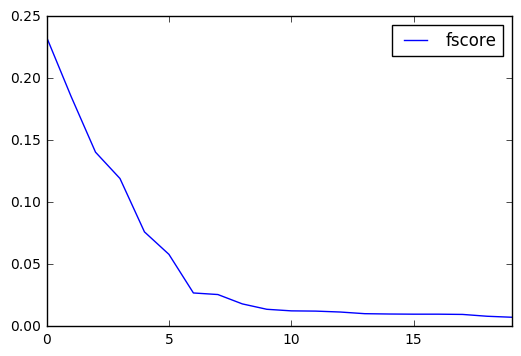

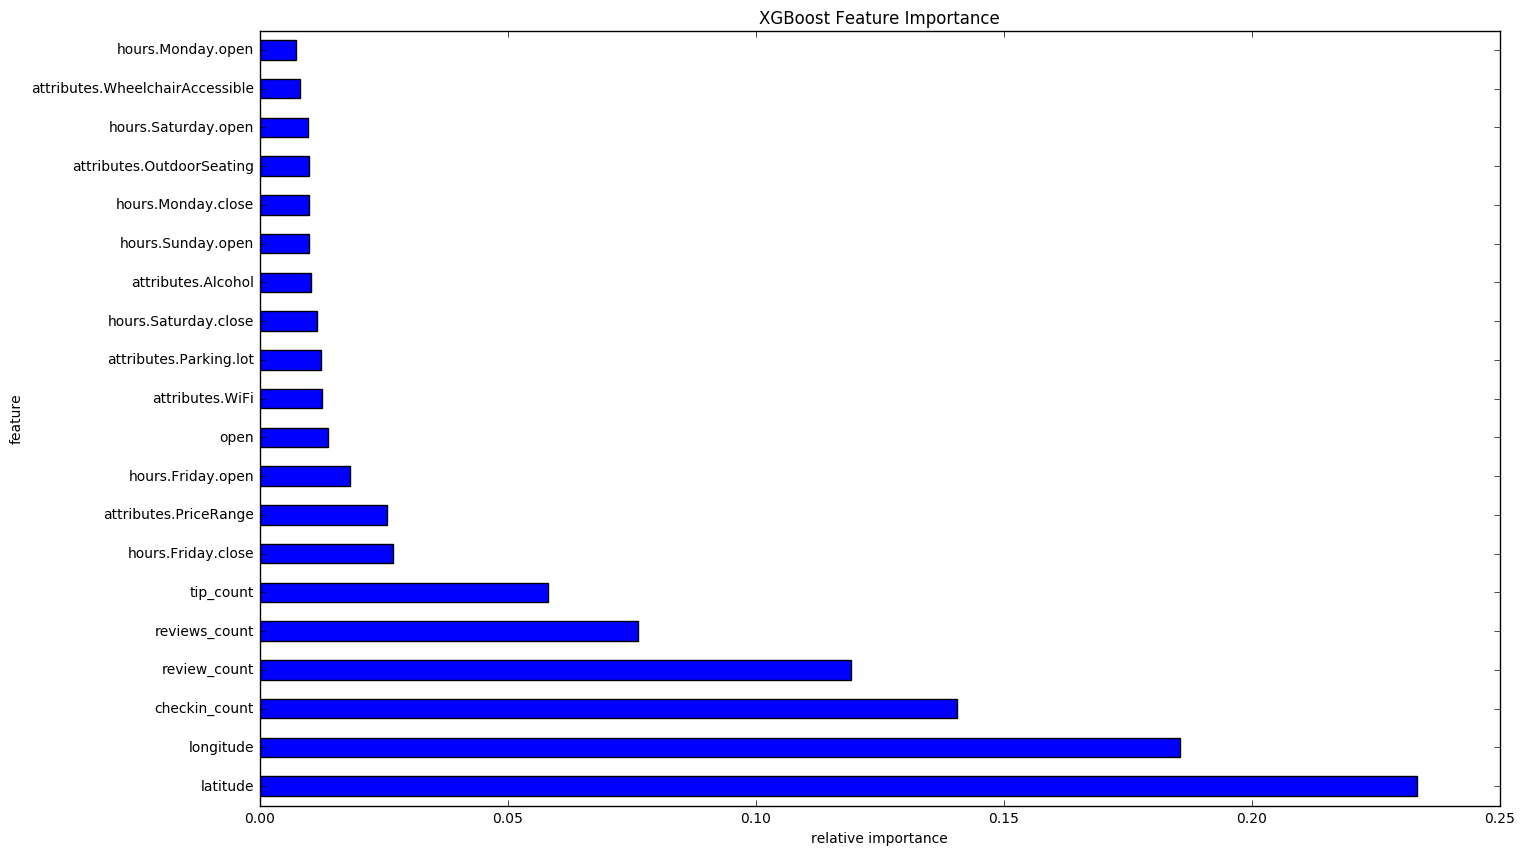

In [93]:
from matplotlib import pylab as plt
all_df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

In [94]:
dtest = xgb.DMatrix(X_test)
ans = gbdt.predict(dtest)
r_square=metrics.r2_score(y_test, ans, sample_weight=None, multioutput='uniform_average')
MSE=metrics.mean_squared_error(y_test, ans)
print('r_square is %s,MSE is %s'%(r_square,MSE))

r_square is -0.0559025685454,MSE is 0.244874523998


## chose one

atrribut is hours.Friday.close 

stars initial is [ 3.01521516] 

value is 0 , result is 3.241862
value is 1 , result is 3.241862
value is 2 , result is 3.241862
value is 5 , result is 3.241862
value is 11 , result is 3.241862
value is 14 , result is 3.241862
value is 15 , result is 3.241862
value is 16 , result is 3.123027
value is 17 , result is 3.123027
value is 18 , result is 3.123027
value is 19 , result is 3.018674
value is 20 , result is 3.019764
value is 21 , result is 3.015215
value is 22 , result is 3.015215
value is 23 , result is 3.015215
value is 25 , result is 3.008147
delta max is [ 0.22664642] 

-------------------------------------------
atrribut is attributes.OutdoorSeating 

stars initial is [ 3.008147] 

value is 0 , result is 3.009361
value is 1 , result is 3.008147
value is 2 , result is 2.856361
delta max is [ 0.00121403] 

-------------------------------------------
atrribut is hours.Friday.open 

stars initial is [ 2.85636115] 

value is 0 , result is 2.856361


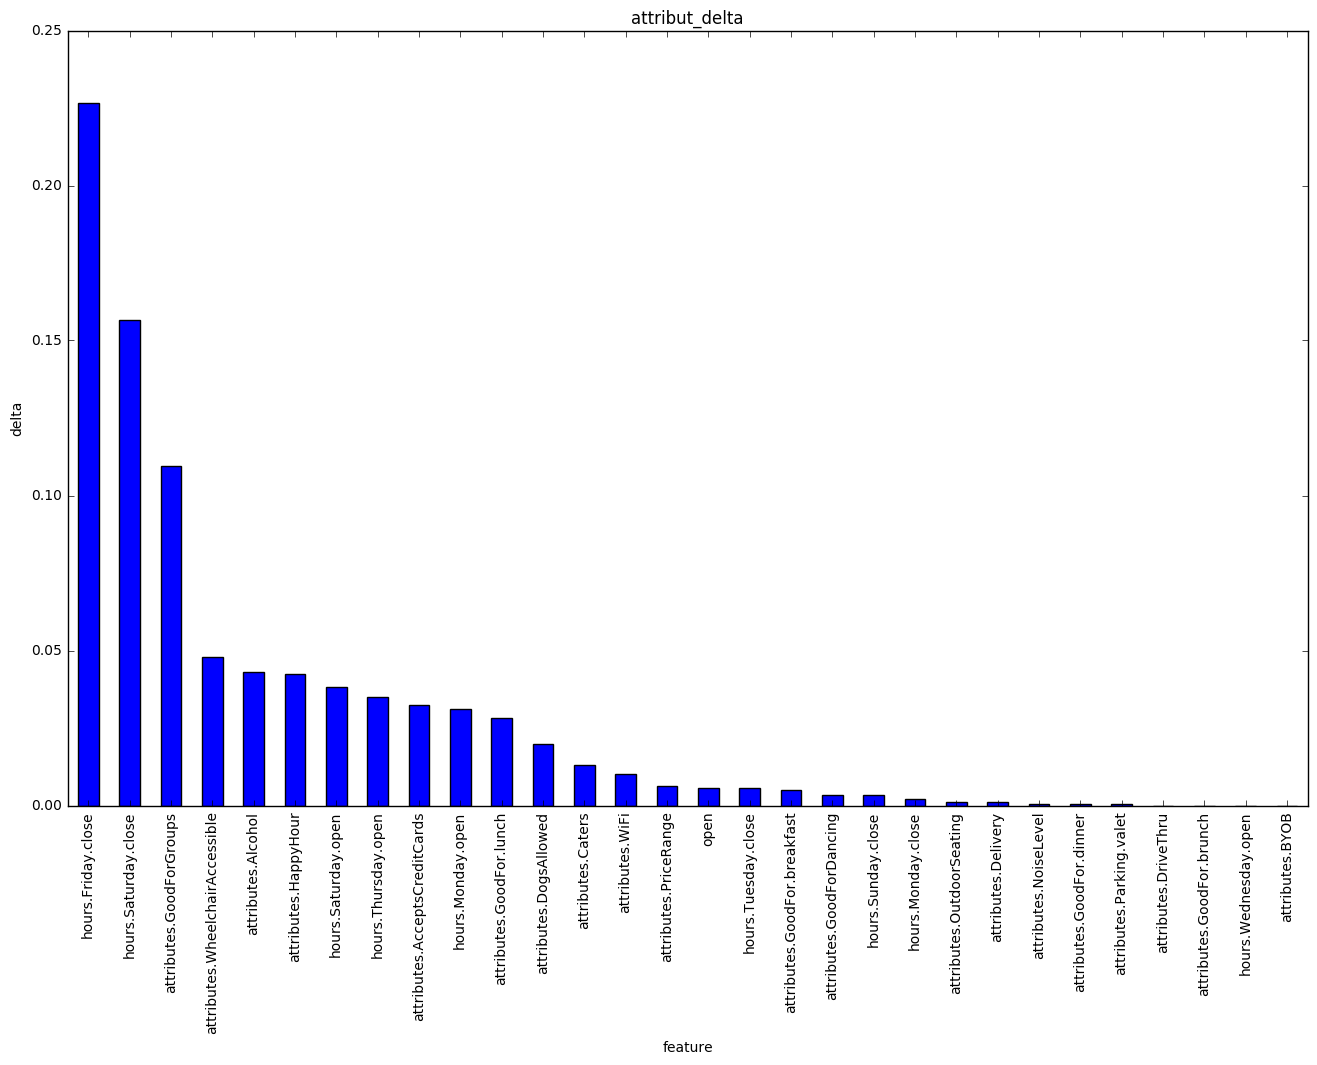

In [95]:
number=100
X_test=all_business[number:number+1]
features = list(X_test.columns[5:96])
X_test = X_test[features]
y_test=X_test['stars']
del X_test['stars']
all_business.drop(all_business.index[[number]],inplace=True)
features = list(all_business.columns[5:96])
X_train = all_business[features]
del X_train['stars']
y_train =all_business['stars']

from sklearn import cross_validation, metrics
from matplotlib import pylab as plt
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(50)
feature=df['feature']
attribut_delta=[]
for i in feature[6:]:
    value=sorted(list(all_business[i].value_counts().index))
    value_init=X_test[i]
    dtest = xgb.DMatrix(X_test)
    ans = gbdt.predict(dtest)
    star_init=ans
    print('atrribut is %s \n'%i)
    print('stars initial is %s \n'%star_init)
    maxi=0
    for j in value:
        X_test[i]=j
        dtest = xgb.DMatrix(X_test)
        ans = gbdt.predict(dtest)
        if ans>maxi:
            maxi=ans
        print('value is %d'%j,',','result is %f'%ans)
    delta=maxi-star_init
    X_test[i]=value_init
    attribut_delta.append((i,delta[0]))
    print('delta max is %s \n'%delta)
    print('-------------------------------------------')

df = pd.DataFrame(attribut_delta, columns=['feature', 'delta'])
df=df.sort_values(by='delta',ascending=False).head(30)

plt.figure()
df.plot(kind='bar', x='feature', y='delta', legend=False, figsize=(16, 10))
plt.title('attribut_delta')
plt.ylabel('delta')
plt.gcf().savefig('attribut_delta.png')
plt.show()

# 5.1bon category bars

In [96]:
bon_category_bars=pd.read_csv('{}/category/bon_category_bars.csv'.format(SHARED_FOLDER))
all_business=bon_category_bars
del all_business['Unnamed: 0']
del all_business['avg_review_stars']
all_business

,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,stars,...,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,reviews_count,tip_count,checkin_count,category,category1,labels
0,"{'Smoking': 'outdoor', 'Music': {'dj': True}, ...",uwIq5b4uOArJQ1G1AfimiQ,"['Gastropubs', 'Bars', 'Restaurants', 'Sports ...",Scottsdale,"{'Saturday': {'close': '02:00', 'open': '11:00...",33.501263,-111.922367,True,46,4.0,...,2,11,2,11,37,4,920,Gastropubs,bars,1
1,"{'Smoking': 'outdoor', 'Music': {'dj': True}, ...",uwIq5b4uOArJQ1G1AfimiQ,"['Gastropubs', 'Bars', 'Restaurants', 'Sports ...",Scottsdale,"{'Saturday': {'close': '02:00', 'open': '11:00...",33.501263,-111.922367,True,46,4.0,...,2,11,2,11,37,4,920,Bars,bars,1
2,"{'Smoking': 'outdoor', 'Music': {'dj': False, ...",h-9z4dgdEghdPLeDMLpDYA,"['Bars', 'Restaurants', 'American (Traditional...",Tempe,"{'Saturday': {'close': '02:00', 'open': '10:00...",33.407892,-111.953919,True,34,4.0,...,2,10,2,10,28,8,133,Bars,bars,1
3,"{'Coat Check': False, 'Has TV': False, 'Music'...",-UnYs8XvV1M983xZoREdng,"['Bars', 'Food', 'Arts & Entertainment', 'Venu...",Scottsdale,"{'Saturday': {'close': '22:00', 'open': '12:00...",33.492517,-111.930037,True,164,4.0,...,20,12,20,12,161,32,495,Bars,bars,1
4,"{'Coat Check': False, 'Has TV': False, 'Music'...",-UnYs8XvV1M983xZoREdng,"['Bars', 'Food', 'Arts & Entertainment', 'Venu...",Scottsdale,"{'Saturday': {'close': '22:00', 'open': '12:00...",33.492517,-111.930037,True,164,4.0,...,20,12,20,12,161,32,495,Wine Bars,bars,1
5,"{'Take-out': True, 'Has TV': True, 'Alcohol': ...",aOlGzngiGZaoewGKAimjTA,"['Bars', 'American (New)', 'Nightlife', 'Resta...",Paradise Valley,"{'Saturday': {'close': '20:00', 'open': '11:00...",33.529734,-111.972578,True,9,4.0,...,20,11,20,11,9,2,67,Bars,bars,1
6,"{'Take-out': True, 'Has TV': True, 'Alcohol': ...",nTc3YXSMR2wglnFgHLC9Ww,"['Wine Bars', 'Bars', 'Restaurants', 'Nightlif...",Tempe,"{'Thursday': {'close': '18:00', 'open': '11:00...",33.424328,-111.934991,True,6,4.5,...,18,11,18,11,6,2,8,Wine Bars,bars,1
7,"{'Take-out': True, 'Has TV': True, 'Alcohol': ...",nTc3YXSMR2wglnFgHLC9Ww,"['Wine Bars', 'Bars', 'Restaurants', 'Nightlif...",Tempe,"{'Thursday': {'close': '18:00', 'open': '11:00...",33.424328,-111.934991,True,6,4.5,...,18,11,18,11,6,2,8,Bars,bars,1
8,"{'Smoking': 'outdoor', 'Music': {'jukebox': Tr...",WGQtcKPzyjYXks4dVnFsNw,"['Bars', 'Restaurants', 'American (Traditional...",Mesa,"{'Saturday': {'close': '00:00', 'open': '09:00...",33.390833,-111.855696,True,70,4.0,...,0,11,0,11,68,10,109,Bars,bars,1
9,"{'Smoking': 'no', 'Music': {'dj': False}, 'Goo...",8ZKHkc8IGwzmPmd96Bf1Kg,"['Bars', 'Food', 'Mediterranean', 'Wine Bars',...",Phoenix,"{'Saturday': {'close': '19:00', 'open': '11:00...",33.404598,-111.979173,True,100,4.5,...,20,10,20,10,95,13,406,Bars,bars,1


## feature and performance

In [97]:
features = list(all_business.columns[5:96])
X = all_business[features]
del X['stars']
y =all_business['stars']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.05, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)
#do_metrics(y_test, ans)

[('latitude', 1443), ('longitude', 1045), ('review_count', 846), ('checkin_count', 706), ('tip_count', 583), ('reviews_count', 341), ('hours.Friday.close', 198), ('hours.Monday.close', 174), ('hours.Saturday.open', 168), ('hours.Sunday.close', 161), ('hours.Sunday.open', 145), ('hours.Monday.open', 136), ('attributes.Caters', 133), ('attributes.GoodFor.dessert', 131), ('hours.Friday.open', 124), ('attributes.Ambience.casual', 112), ('open', 107), ('attributes.WheelchairAccessible', 105), ('hours.Thursday.close', 101), ('attributes.DogsAllowed', 93), ('attributes.Music.dj', 92), ('attributes.Smoking', 89), ('attributes.Alcohol', 86), ('attributes.Ambience.intimate', 85), ('attributes.NoiseLevel', 83), ('hours.Tuesday.close', 83), ('attributes.Parking.street', 82), ('attributes.GoodFor.dinner', 82), ('attributes.HappyHour', 82), ('attributes.Music.live', 80), ('attributes.Takeout', 77), ('hours.Saturday.close', 76), ('attributes.Music.background_music', 72), ('attributes.BYOB/Corkage', 6

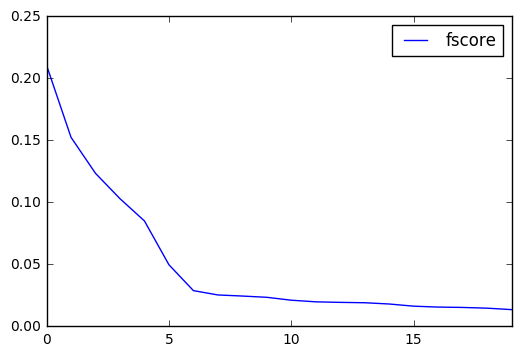

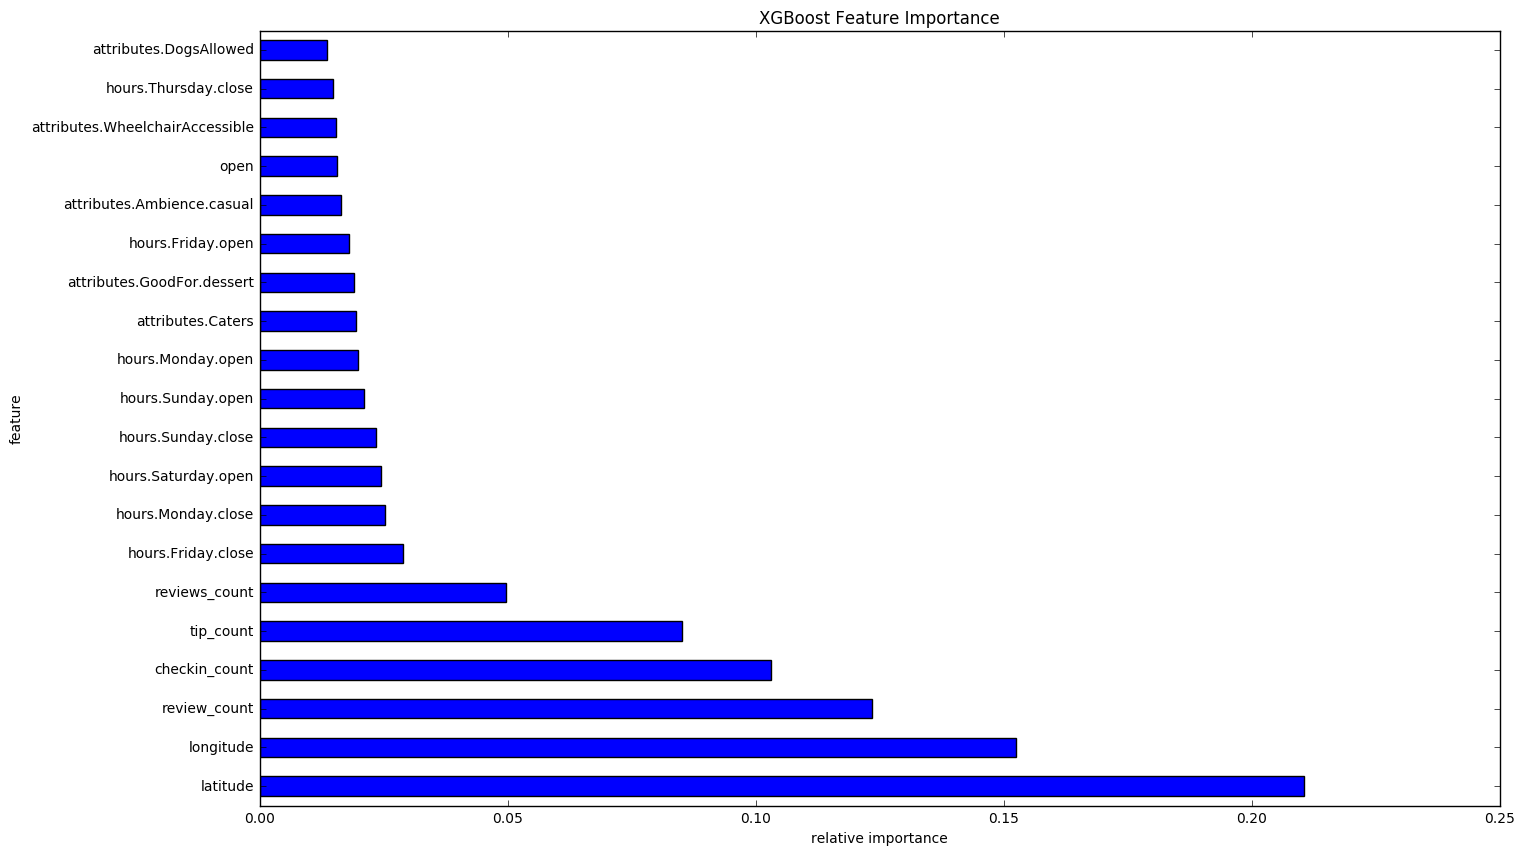

In [98]:
from matplotlib import pylab as plt
all_df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

In [99]:
dtest = xgb.DMatrix(X_test)
ans = gbdt.predict(dtest)
r_square=metrics.r2_score(y_test, ans, sample_weight=None, multioutput='uniform_average')
MSE=metrics.mean_squared_error(y_test, ans)
print('r_square is %s,MSE is %s'%(r_square,MSE))

r_square is 0.319292314757,MSE is 0.0410490877474


## chose one

atrribut is hours.Sunday.open 

stars initial is [ 4.02058125] 

value is 0 , result is 4.005461
value is 6 , result is 4.005461
value is 7 , result is 4.005428
value is 8 , result is 4.015763
value is 9 , result is 4.018929
value is 10 , result is 4.018929
value is 11 , result is 4.018929
value is 12 , result is 4.021041
value is 13 , result is 4.021041
value is 15 , result is 4.020581
value is 16 , result is 4.020581
value is 17 , result is 4.026020
value is 18 , result is 4.026020
value is 23 , result is 4.026020
value is 25 , result is 4.026020
delta max is [ 0.0054388] 

-------------------------------------------
atrribut is attributes.Alcohol 

stars initial is [ 4.02602005] 

value is 0 , result is 4.040504
value is 1 , result is 4.040504
value is 2 , result is 4.040504
value is 3 , result is 4.026020
delta max is [ 0.01448441] 

-------------------------------------------
atrribut is hours.Saturday.open 

stars initial is [ 4.02602005] 

value is 0 , result is 4.025830
value i

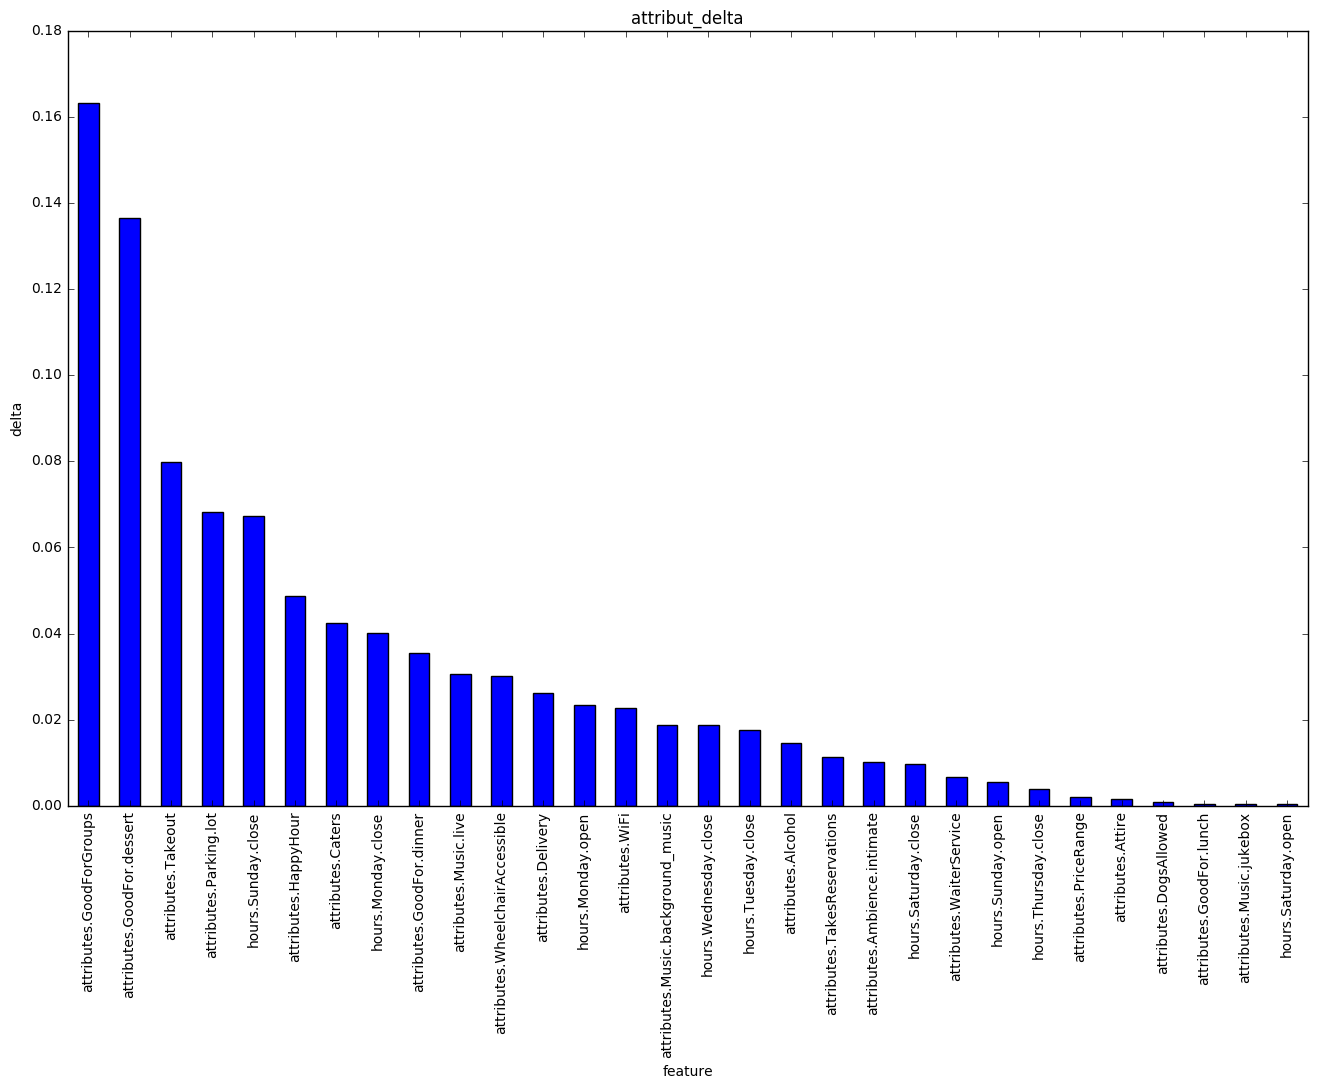

In [100]:
number=100
X_test=all_business[number:number+1]
features = list(X_test.columns[5:96])
X_test = X_test[features]
y_test=X_test['stars']
del X_test['stars']
all_business.drop(all_business.index[[number]],inplace=True)
features = list(all_business.columns[5:96])
X_train = all_business[features]
del X_train['stars']
y_train =all_business['stars']

from sklearn import cross_validation, metrics
from matplotlib import pylab as plt
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(50)
feature=df['feature']
attribut_delta=[]
for i in feature[6:]:
    value=sorted(list(all_business[i].value_counts().index))
    value_init=X_test[i]
    dtest = xgb.DMatrix(X_test)
    ans = gbdt.predict(dtest)
    star_init=ans
    print('atrribut is %s \n'%i)
    print('stars initial is %s \n'%star_init)
    maxi=0
    for j in value:
        X_test[i]=j
        dtest = xgb.DMatrix(X_test)
        ans = gbdt.predict(dtest)
        if ans>maxi:
            maxi=ans
        print('value is %d'%j,',','result is %f'%ans)
    delta=maxi-star_init
    X_test[i]=value_init
    attribut_delta.append((i,delta[0]))
    print('delta max is %s \n'%delta)
    print('-------------------------------------------')

df = pd.DataFrame(attribut_delta, columns=['feature', 'delta'])
df=df.sort_values(by='delta',ascending=False).head(30)

plt.figure()
df.plot(kind='bar', x='feature', y='delta', legend=False, figsize=(16, 10))
plt.title('attribut_delta')
plt.ylabel('delta')
plt.gcf().savefig('attribut_delta.png')
plt.show()

# 5.2mauvais category bars

In [101]:
mauvais_category_bars=pd.read_csv('{}/category/mauvais_category_bars.csv'.format(SHARED_FOLDER))
all_business=mauvais_category_bars
del all_business['Unnamed: 0']
del all_business['avg_review_stars']
all_business

,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,stars,...,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,reviews_count,tip_count,checkin_count,category,category1,labels
0,"{'Smoking': 'no', 'Music': {'dj': False}, 'Goo...",cjUmPLRT43wN9Z87A9BOpg,"['Bars', 'American (Traditional)', 'Nightlife'...",Phoenix,"{'Saturday': {'close': '02:00', 'open': '11:00...",33.509568,-112.073327,True,85,2.5,...,1,11,1,11,78,30,357,Bars,bars,0
1,"{'Smoking': 'outdoor', 'Music': {'dj': False, ...",uyQ0mDz0OKEgUkBKWIl3og,"['Nightlife', 'Wine Bars', 'Thai', 'Bars', 'Re...",Peoria,"{'Saturday': {'close': '22:00', 'open': '11:00...",33.635355,-112.235027,False,113,3.5,...,21,11,21,11,108,25,208,Wine Bars,bars,0
2,"{'Smoking': 'outdoor', 'Music': {'dj': False, ...",uyQ0mDz0OKEgUkBKWIl3og,"['Nightlife', 'Wine Bars', 'Thai', 'Bars', 'Re...",Peoria,"{'Saturday': {'close': '22:00', 'open': '11:00...",33.635355,-112.235027,False,113,3.5,...,21,11,21,11,108,25,208,Bars,bars,0
3,"{'Delivery': False, 'Has TV': True, 'Alcohol':...",fmpEjlZhFlMHaGmsKJlUTg,"['Nightlife', 'Seafood', 'American (Traditiona...",Phoenix,"{'Saturday': {'close': '00:00', 'open': '06:00...",33.675603,-112.100430,True,43,3.0,...,0,6,0,6,40,17,134,Bars,bars,0
4,"{'Smoking': 'outdoor', 'Music': {'live': True,...",d06ZIF5TeK5j_Pii7_LmXA,"['Nightlife', 'Bars', 'American (Traditional)'...",Maricopa,"{'Saturday': {'close': '02:00', 'open': '11:00...",33.071187,-112.044967,False,19,3.5,...,1,11,1,11,17,7,38,Bars,bars,0
5,"{'Smoking': 'outdoor', 'Music': {'dj': False},...",wNGb_2d7xNME1gEvzluCnA,"['Bars', 'American (Traditional)', 'Nightlife'...",Surprise,"{'Saturday': {'close': '21:00', 'open': '07:00...",33.649490,-112.366554,True,34,3.0,...,21,7,21,7,33,4,36,Bars,bars,0
6,"{'Smoking': 'outdoor', 'Music': {'live': True,...",d840tbYJSVn8Fu-n5XRJTw,"['Country Dance Halls', 'Bars', 'Nightlife', '...",Scottsdale,"{'Saturday': {'close': '02:00', 'open': '16:00...",33.583171,-111.927507,True,69,3.5,...,2,16,2,16,67,20,352,Bars,bars,0
7,"{'Music': {'dj': False}, 'Good for Kids': True...",ivu21BhbezZO9se1ueFZdw,"['Bars', 'Restaurants', 'American (Traditional...",Mesa,"{'Saturday': {'close': '02:00', 'open': '11:00...",33.320991,-111.685269,True,53,3.0,...,1,11,1,11,51,10,107,Bars,bars,0
8,"{'Smoking': 'outdoor', 'Music': {'dj': False, ...",NcAI7SE1SNlrOEfFg9Wzuw,"['Bars', 'Dance Clubs', 'Nightlife', 'Lounges'...",Phoenix,"{'Saturday': {'close': '00:00', 'open': '16:00...",33.450459,-112.074077,False,32,3.0,...,1,16,1,16,31,17,104,Bars,bars,0
9,"{'Coat Check': False, 'Has TV': False, 'Music'...",VxZU1FsoL7YJhiQ1O3S8bQ,"['Bars', 'Food', 'Arts & Entertainment', 'Wine...",Tempe,{},33.361351,-111.910546,False,31,3.5,...,25,25,25,25,29,8,67,Bars,bars,0


## feature and performance

In [102]:
features = list(all_business.columns[5:96])
X = all_business[features]
del X['stars']
y =all_business['stars']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.05, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)
#do_metrics(y_test, ans)

[('latitude', 3272), ('longitude', 3080), ('review_count', 1845), ('checkin_count', 1696), ('tip_count', 1268), ('reviews_count', 892), ('hours.Sunday.close', 356), ('attributes.NoiseLevel', 336), ('hours.Monday.close', 324), ('attributes.Music.dj', 320), ('hours.Friday.close', 305), ('open', 281), ('attributes.Ambience.casual', 265), ('attributes.Caters', 261), ('attributes.WheelchairAccessible', 243), ('attributes.Smoking', 240), ('hours.Saturday.open', 238), ('attributes.WiFi', 236), ('attributes.GoodFor.lunch', 234), ('attributes.GoodFor.dinner', 213), ('attributes.Music.jukebox', 205), ('attributes.Delivery', 205), ('hours.Sunday.open', 200), ('attributes.TakesReservations', 189), ('hours.Friday.open', 181), ('attributes.GoodForDancing', 176), ('attributes.Music.live', 167), ('attributes.DogsAllowed', 165), ('hours.Thursday.close', 165), ('attributes.GoodFor.latenight', 161), ('attributes.Parking.lot', 154), ('attributes.Music.background_music', 144), ('attributes.OutdoorSeating',

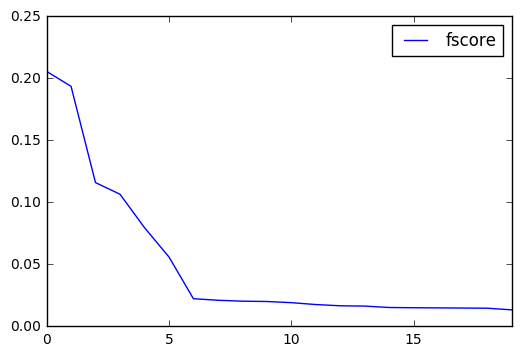

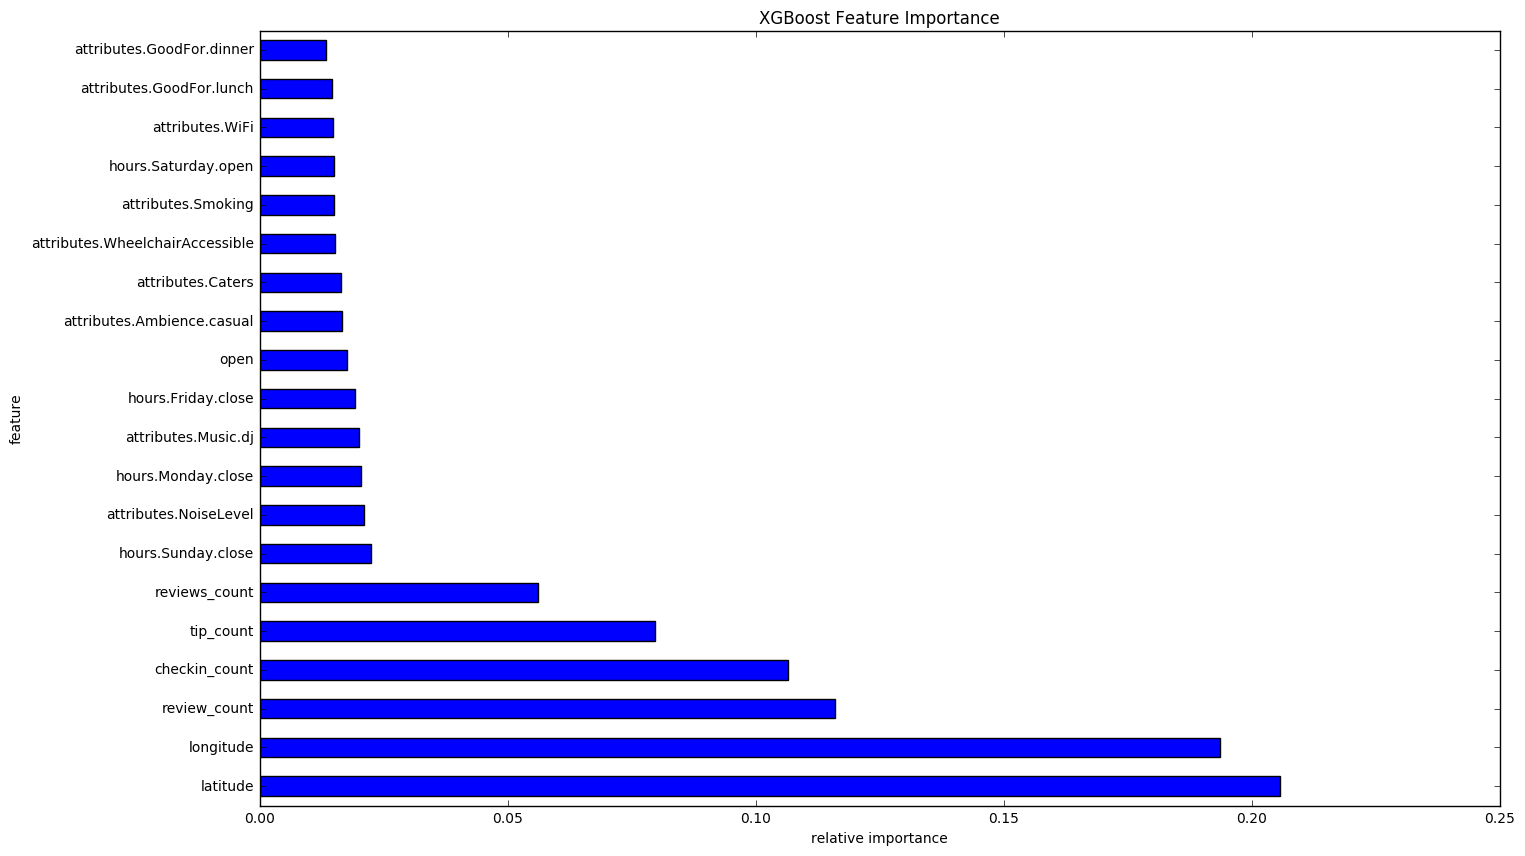

In [103]:
from matplotlib import pylab as plt
all_df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

In [104]:
dtest = xgb.DMatrix(X_test)
ans = gbdt.predict(dtest)
r_square=metrics.r2_score(y_test, ans, sample_weight=None, multioutput='uniform_average')
MSE=metrics.mean_squared_error(y_test, ans)
print('r_square is %s,MSE is %s'%(r_square,MSE))

r_square is 0.103763184449,MSE is 0.172864252679


## chose one

atrribut is hours.Sunday.close 

stars initial is [ 3.39500713] 

value is 0 , result is 3.314830
value is 1 , result is 3.371941
value is 2 , result is 3.395007
value is 3 , result is 3.395007
value is 4 , result is 3.395007
value is 14 , result is 3.418956
value is 15 , result is 3.418956
value is 16 , result is 3.418956
value is 17 , result is 3.418956
value is 18 , result is 3.418956
value is 20 , result is 3.418956
value is 21 , result is 3.420220
value is 22 , result is 3.397888
value is 23 , result is 3.348020
value is 25 , result is 3.348020
delta max is [ 0.02521253] 

-------------------------------------------
atrribut is attributes.NoiseLevel 

stars initial is [ 3.3480196] 

value is 0 , result is 3.335097
value is 1 , result is 3.337179
value is 2 , result is 3.348020
value is 3 , result is 3.306549
value is 4 , result is 3.301996
delta max is [ 0.] 

-------------------------------------------
atrribut is hours.Monday.close 

stars initial is [ 3.30199575] 

value is 0 ,

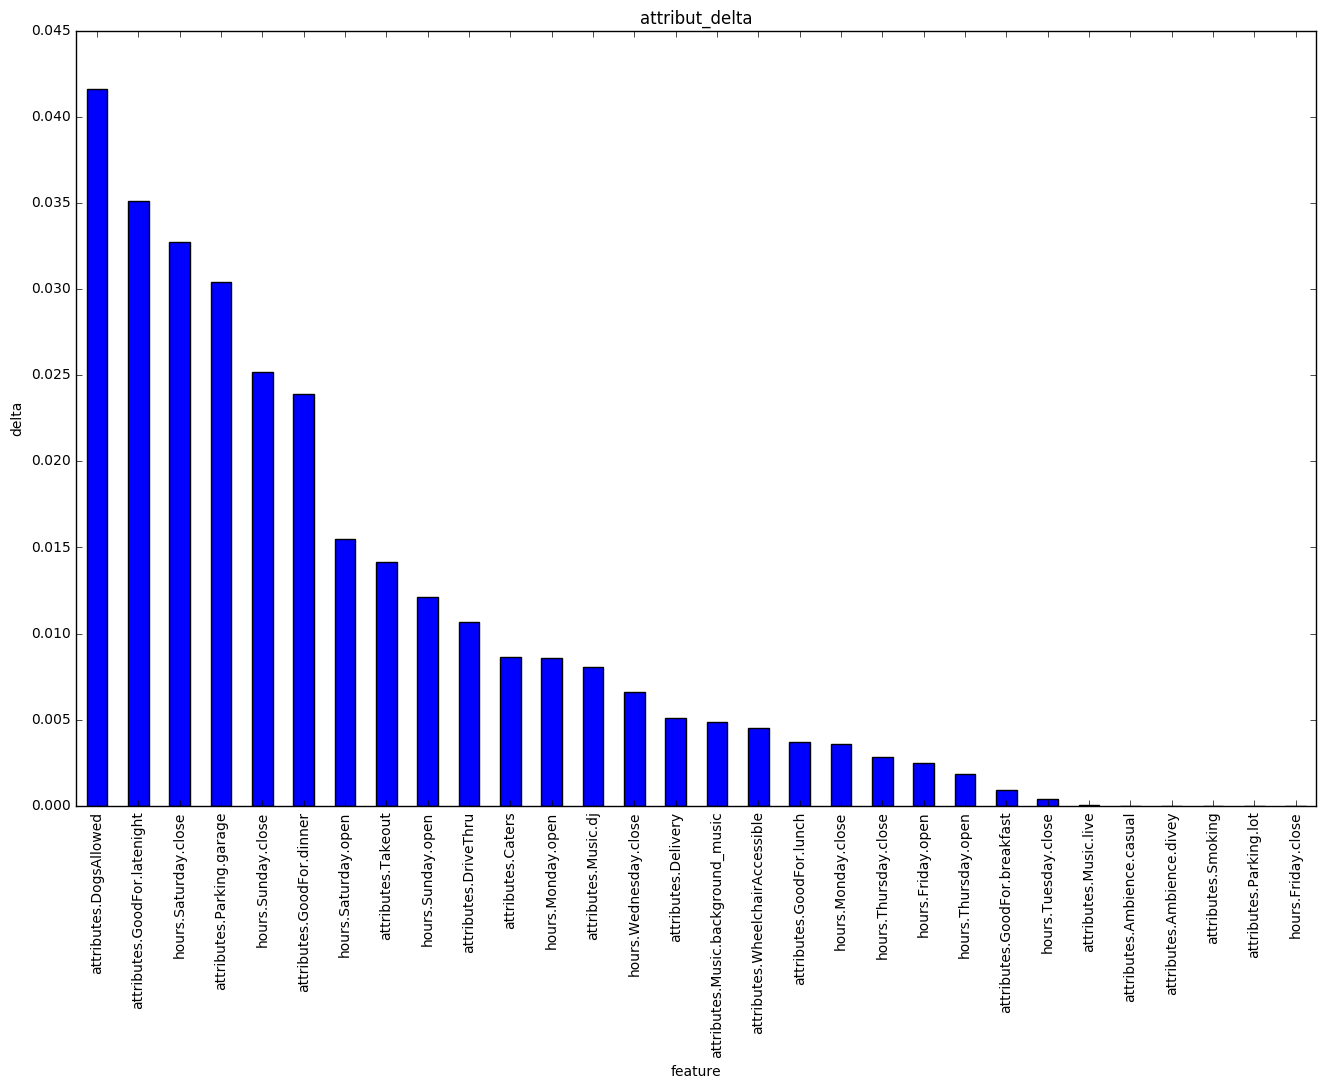

In [105]:
number=100
X_test=all_business[number:number+1]
features = list(X_test.columns[5:96])
X_test = X_test[features]
y_test=X_test['stars']
del X_test['stars']
all_business.drop(all_business.index[[number]],inplace=True)
features = list(all_business.columns[5:96])
X_train = all_business[features]
del X_train['stars']
y_train =all_business['stars']

from sklearn import cross_validation, metrics
from matplotlib import pylab as plt
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(50)
feature=df['feature']
attribut_delta=[]
for i in feature[6:]:
    value=sorted(list(all_business[i].value_counts().index))
    value_init=X_test[i]
    dtest = xgb.DMatrix(X_test)
    ans = gbdt.predict(dtest)
    star_init=ans
    print('atrribut is %s \n'%i)
    print('stars initial is %s \n'%star_init)
    maxi=0
    for j in value:
        X_test[i]=j
        dtest = xgb.DMatrix(X_test)
        ans = gbdt.predict(dtest)
        if ans>maxi:
            maxi=ans
        print('value is %d'%j,',','result is %f'%ans)
    delta=maxi-star_init
    X_test[i]=value_init
    attribut_delta.append((i,delta[0]))
    print('delta max is %s \n'%delta)
    print('-------------------------------------------')

df = pd.DataFrame(attribut_delta, columns=['feature', 'delta'])
df=df.sort_values(by='delta',ascending=False).head(30)

plt.figure()
df.plot(kind='bar', x='feature', y='delta', legend=False, figsize=(16, 10))
plt.title('attribut_delta')
plt.ylabel('delta')
plt.gcf().savefig('attribut_delta.png')
plt.show()